# Research Questions

**[RQ1]** In what period of the year Taxis are used more? Create a plot that, for each month, shows the average number of trips recorded each day. Due to the differences among New York zones, we want to visualize the same information for each boroughs. Do you notice any difference among them? Provide comments and plausible explanations about what you observe (e.g.: what is the month with the highest daily average?).

We first import the librare we need to make our job easier. We found out about these libraries during the lab class, by the submission of the HW itself or by google it. 

In [5]:
import pandas
import pandas as pd
import numpy as np
import re
from datetime import datetime, time
import matplotlib.pyplot as plt

The *read_cvs* function opens the file in cvs format. Inside this function we indicate the columns we will use, and the *dtype* of each column, this helps Jupyter to read cvs faster.

In [2]:
def read_csv(month,number):
    cmd= month+"=pandas.read_csv('yellow_tripdata_2018-0"+str(number)+".csv', sep=',',dtype={'tpep_pickup_datetime':str,'PULocationID':int}, usecols=['tpep_pickup_datetime','PULocationID'])"
    exec(cmd)
    return eval(month)

The *clean_errors* function: reading files we discoreved the are some errors related to dates. For example inside Jan's file we could find datas about December (of the year before) and February, and so on for the other months. 
We decided to clean the files by deleting the datas those were not precised. This funtion, to run, needs an df=DataFrame and n=the right month's numer (EX: for January, n=1).

In [3]:
def clean_errors(df,n):
    df['tpep_pickup_datetime']=pandas.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
    cmd="df.loc[:,'month']=df['tpep_pickup_datetime'].dt.month"
    exec(cmd)
    cmd="df[df['month'] == "+str(n)+"]"
    df=eval(cmd)
    del cmd
    del df['month']
    return df

The function *merge_zone* merge two different DataFrame, it takes as input a speciific DataFrame then it clean it by the right date and, at the end, it merges it with the DataFrame containing the different zones of NYC.

In [4]:
def merge_zone(df,n):
    zone=pd.read_csv('taxi _zone_lookup.csv', sep=',', usecols=['LocationID','Borough'])
    df=clean_errors(df,n)
    df.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
    df = pd.merge(zone, df, on='LocationID')
    del zone
    return df

dictonary *d* helps us to call the different files, by the first three letter of each month as key, for each key it indicates the *n* and the lenght of the month (count by days)

In [5]:
d={'jan':[1,31],'feb':[2,28],'mar':[3,31],'apr':[4,30],'may':[5,31],'jun':[6,30]}


The function *count_per_borough* count for each borough the avarage of the trips per day

In [6]:
def count_per_borough(df,bor,n):
    cmd= "df.loc[(df['Borough']=='"+(bor)+"')]"
    g=eval(cmd)
    m=len(g)//n
    del g
    return m

The funtion *create_dict* , by a DataFrame (**df**, describing the situation for each month) and a **n** (number of days of the month), it creates a dictonary having two keys: "boroughs" and the "avarage" of the number of taxi's trips for each month.

In [7]:
def create_dict(df,n):
    bor=['EWR',"Queens","Bronx","Manhattan","Staten Island","Unknown",'Brooklyn']
    final={}
    final['Borough']=[]
    final['avarage']=[]
    for i in bor:
        m=count_per_borough(df,i,n)
        final['Borough'].append(i)
        final['avarage'].append(m)
    return final

With this loop we manage to create a DataFrame for each month (ex:d_jan, d_feb). this will help us to show a plot describing simultanuely the issue.

In [22]:
for i in d:
    number=d[i][0]
    n=d[i][1]
    cmd='read_csv("'+str(i)+'",number)'
    df=eval(cmd)
    df=merge_zone(df,number)
    cmd='d_'+str(i)+'=create_dict(df,n)'
    exec(cmd)
    del df

C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


*list* is a list containing all the names of the DataFrame of the months.
*bor* is a list containing the names of the Boroughs of NYC

In [23]:
list=[d_jan,d_feb,d_mar,d_apr,d_may,d_jun]
bor=['EWR',"Queens","Bronx","Manhattan","Staten_Island","Unknown",'Brooklyn']

Now we are going to create a DataFrame, called *tab*, with all the boroughs and all the avarages of the trips per day for each month. *Tab* is showed later.

In [24]:
tab= pandas.DataFrame(index=bor)
for i in d:
    cmd='d_'+i+'["avarage"]'
    tab[i]=eval(cmd)

In [25]:
tab

,jan,feb,mar,apr,may,jun
EWR,18,17,21,23,24,22
Queens,16996,17303,18218,19876,19703,19157
Bronx,238,234,333,347,350,340
Manhattan,256948,277401,276368,280945,269345,262610
Staten_Island,4,3,4,4,4,5
Unknown,5126,4907,5250,5001,4150,4208
Brooklyn,3233,3396,3965,3968,3961,4098


The next plot will help us to see the behaviour of the fenomenous at a very large scale, even if it's not very precise. Afterwards we will make other plots more precise.


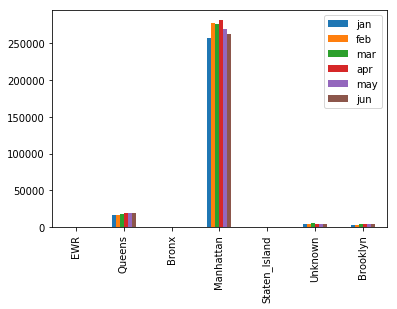

In [26]:
tab.plot(kind='bar')

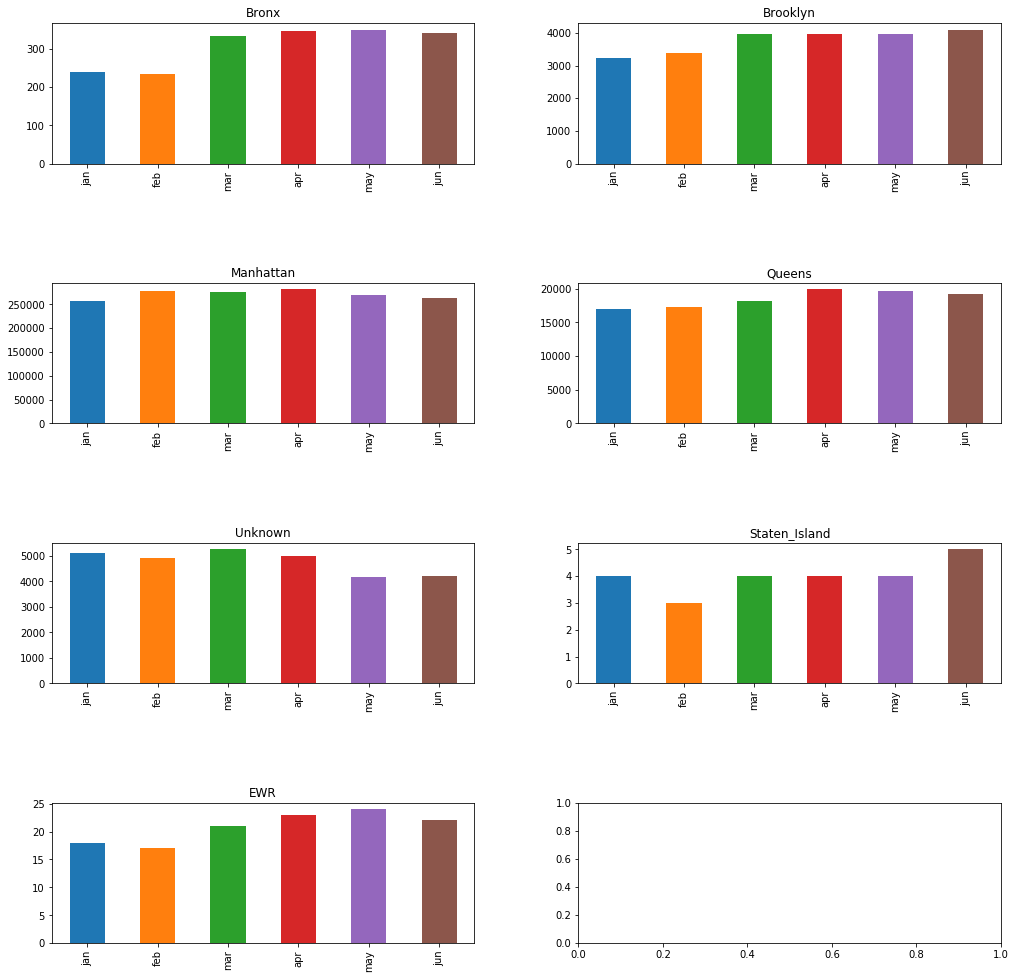

In [27]:
t=tab.T
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.tight_layout()
t.Bronx.plot.bar(title= 'Bronx',figsize=(15,15),ax=axes[0,0])
t.Brooklyn.plot.bar(title= 'Brooklyn',figsize=(15,15),ax=axes[0,1])
t.Manhattan.plot.bar(title= 'Manhattan',figsize=(15,15),ax=axes[1,0])
t.Queens.plot.bar(title= 'Queens',figsize=(15,15),ax=axes[1,1])
t.Unknown.plot.bar(title= 'Unknown',figsize=(15,15),ax=axes[2,0])
t.EWR.plot.bar(title= 'EWR',figsize=(15,15),ax=axes[3,0])
t.Staten_Island.plot.bar(title= 'Staten_Island',figsize=(15,15),ax=axes[2,1])

Now we plot the sum of all trips and the different months

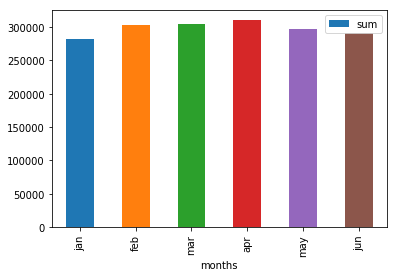

In [28]:
months=['jan','feb','mar','apr','may','jun']
final={}
final['months']=[]
final['sum']=[]
for m in months:
    s=tab[m].sum().sum()
    final['months'].append(m)
    final['sum'].append(s)
final=pandas.DataFrame(final)
final.plot.bar(x='months',y='sum')

## RESULTS [RQ1]

-As we can easly see from the the tha final DataFrame (*tab*) and the plot, Manahattan is the borough that *drive* the fonomenous, this beacuse a very large number of trips start from this zone. Indeed the finacial discrict and most of the offices are in Manahattan. The reach people, infact, use to live in Manhattan and they prefer to use taxi

-From the last plot we can see that during April the sum of the trips is maxim. This is because April is a very turistic month.



**[RQ2]** What are the time slots with more passengers? Set your own time slots and discover which are those when Taxis drive the highest number of passengers overall New York and repeat the analysis for each borough. Provide the results through a visualization and comment them.

We add the columns we will need to the function *read_cvs*. In particular we add the column **passenger_count**

In [29]:
def read_csv(month,number):
    cmd= month+" =pandas.read_csv('yellow_tripdata_2018-0"+str(number)+".csv', sep=',',dtype={'tpep_pickup_datetime':str,'PULocationID':int,'passenger_count':int}, usecols=['tpep_pickup_datetime','PULocationID','passenger_count'])"
    exec(cmd)
    return eval(month)

The function *divide_per_hour*  takes as input a DataFrame and it makes another one with index all the hours of the day (0:23) and for columns the differents Boroughs of NYC. It indicates us the sum of the taxi's trips every hour.

In [30]:
def divide_per_hour(df):
    cmd="df.loc[:,'hours']=df['tpep_pickup_datetime'].dt.hour"
    exec(cmd)
    cmd="df2=df.groupby(['Borough','hours'])['passenger_count'].agg('sum')"
    exec(cmd)
    cmd="df2.unstack().transpose().fillna(0)"
    df=eval(cmd)
    exec('del df2')
    return df

The function *task_2* take as input the name of the months (always the first three letters) and,with the help of the funtion described before (also in task 1), it create 7 plots.
The first 6 plots show the sum of taxi's trips per hour, for each borough.
The last plot shows the sum of taxi's per hour in all NYC

In [32]:
def task_2(month):
    dfn=month
    n=d[dfn][0]
    df=read_csv(dfn,n)
    cmd="df['tpep_pickup_datetime']=pandas.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')"
    exec(cmd)
    df=clean_errors(df,n)
    df2=merge_zone(df,n)
    del df
    df=divide_per_hour(df2)
    del df2
    df['sum'] = df.sum(axis=1)
    df.rename(columns={'Staten Island': 'Staten_Island'}, inplace=True)
    fig, axes = plt.subplots(nrows=4, ncols=2)
    fig.tight_layout()
    df.Bronx.plot.bar(title= 'Bronx',figsize=(15,15),ax=axes[0,0])
    df.Brooklyn.plot.bar(title= 'Brooklyn',figsize=(15,15),ax=axes[0,1])
    df.Manhattan.plot.bar(title= 'Manhattan',figsize=(15,15),ax=axes[1,0])
    df.Queens.plot.bar(title= 'Queens',figsize=(15,15),ax=axes[1,1])
    df.Unknown.plot.bar(title= 'Unknown',figsize=(15,15),ax=axes[2,0])
    df.Staten_Island.plot.bar(title= 'Staten_Island',figsize=(15,15),ax=axes[2,1])
    df.EWR.plot.bar(title= 'EWR',figsize=(15,15),ax=axes[3,0])
    df2=pandas.DataFrame(df['sum'])
    df2.plot.bar()
    del df
    del df2

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

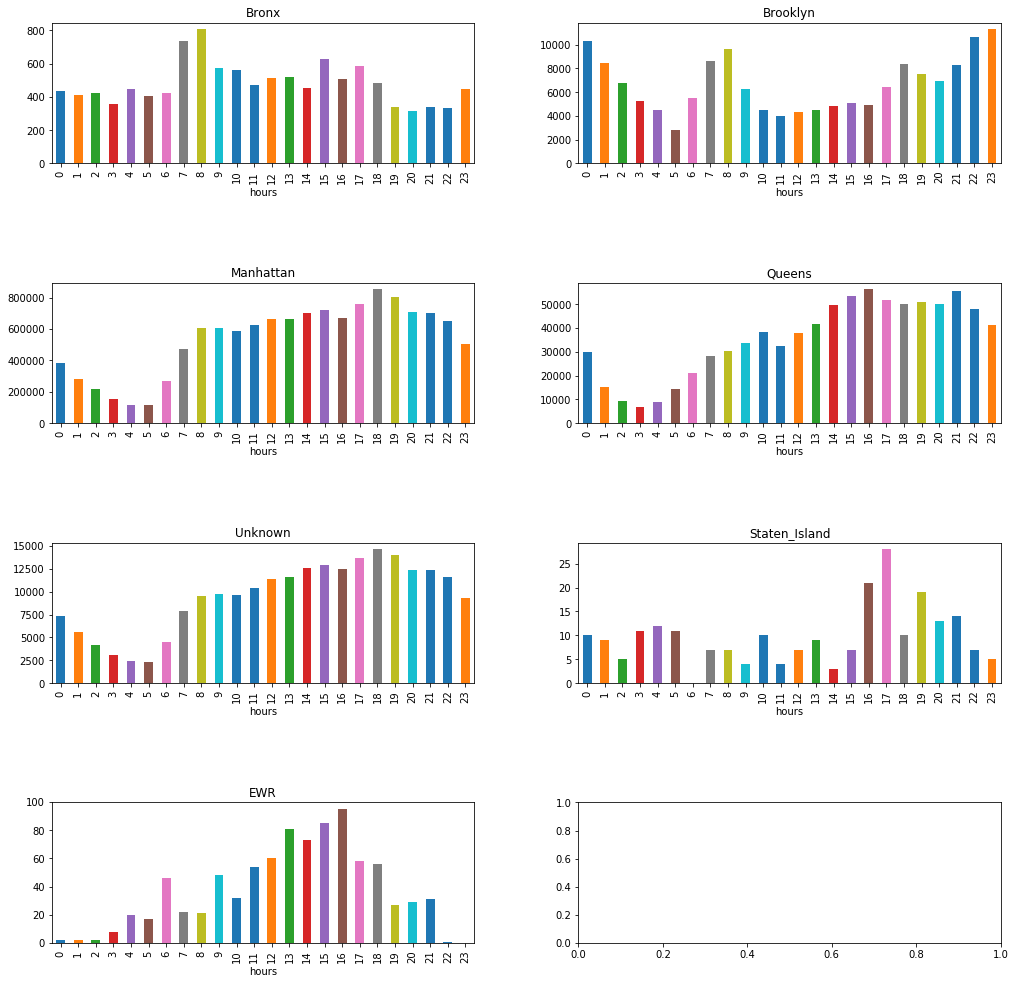

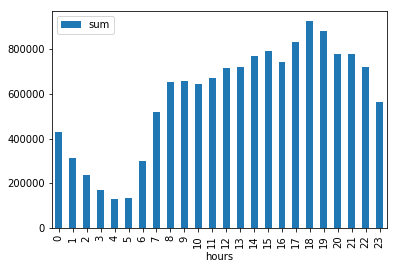

In [33]:
task_2('jan')

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

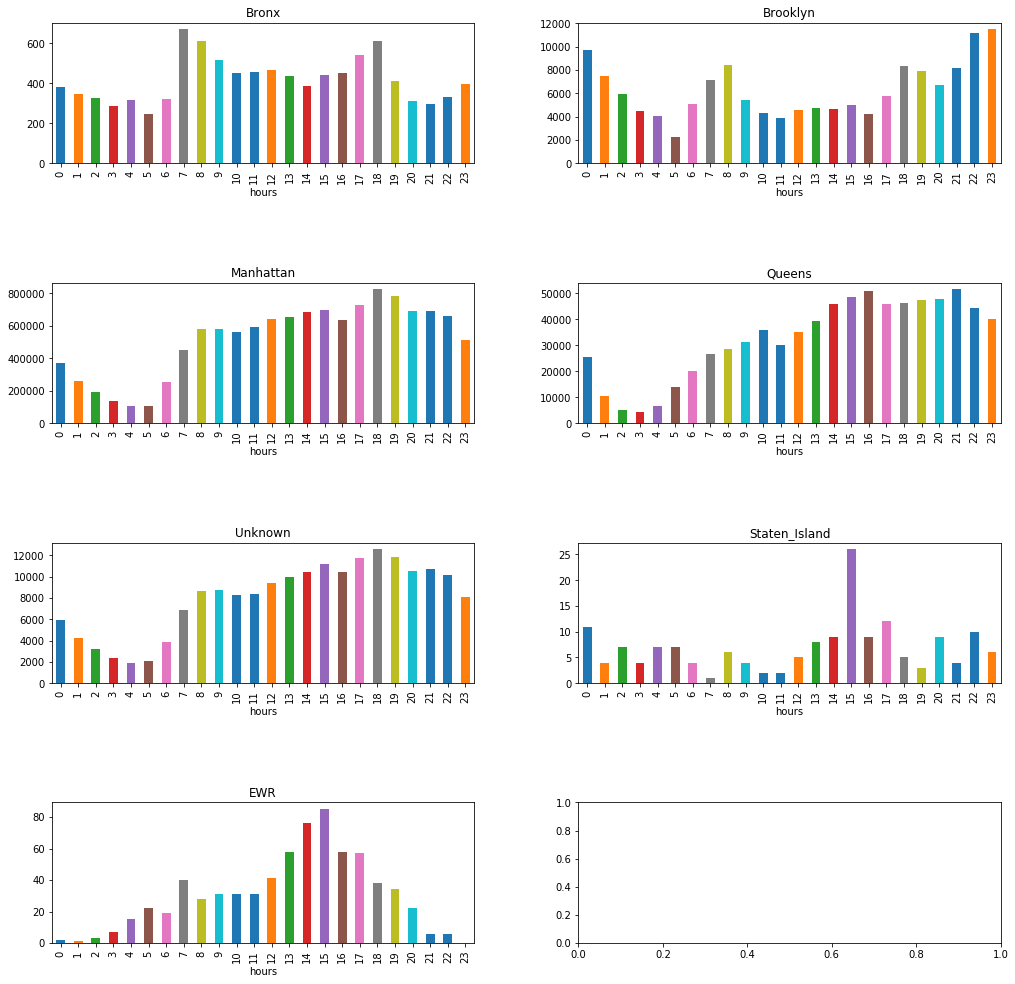

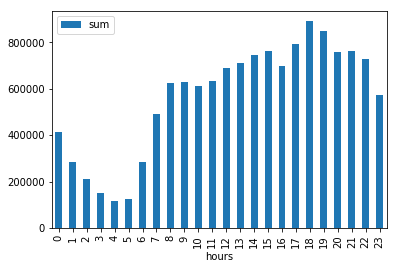

In [34]:
task_2('feb')

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

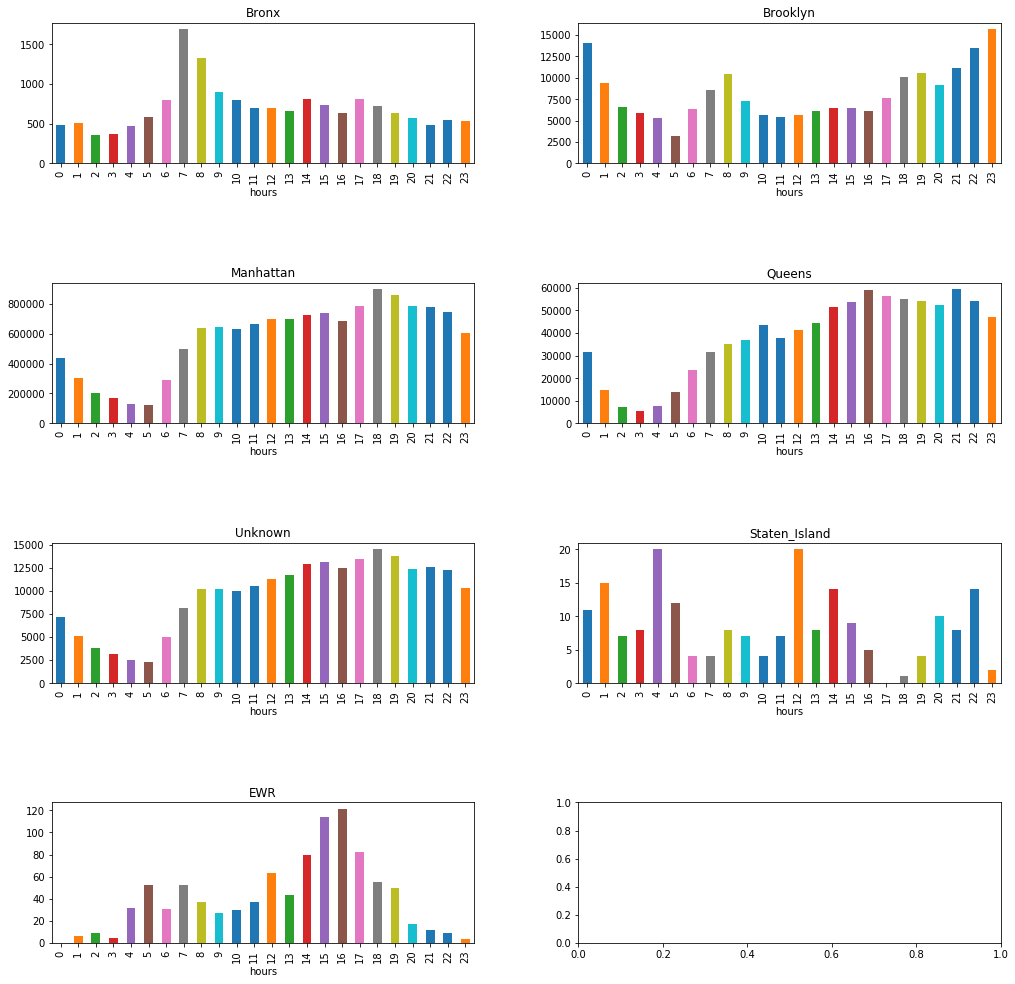

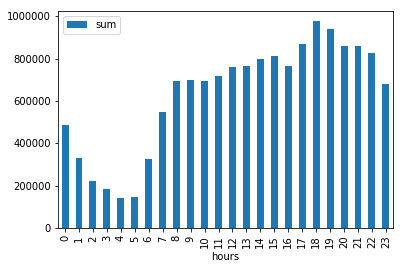

In [35]:
task_2('mar')

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

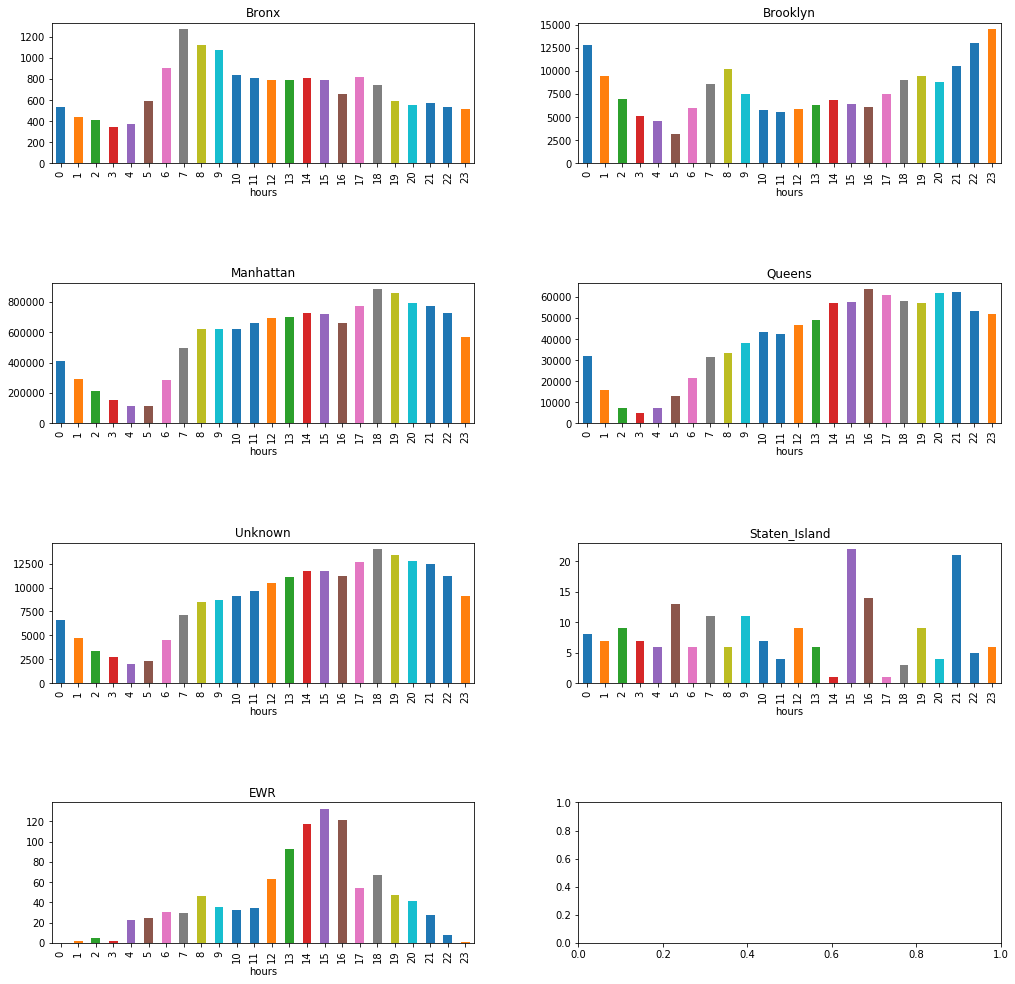

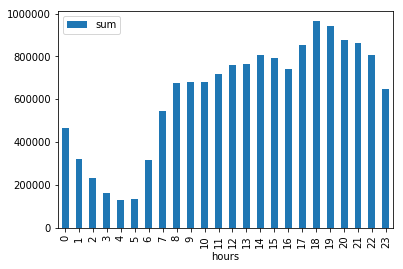

In [36]:
task_2('apr')

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

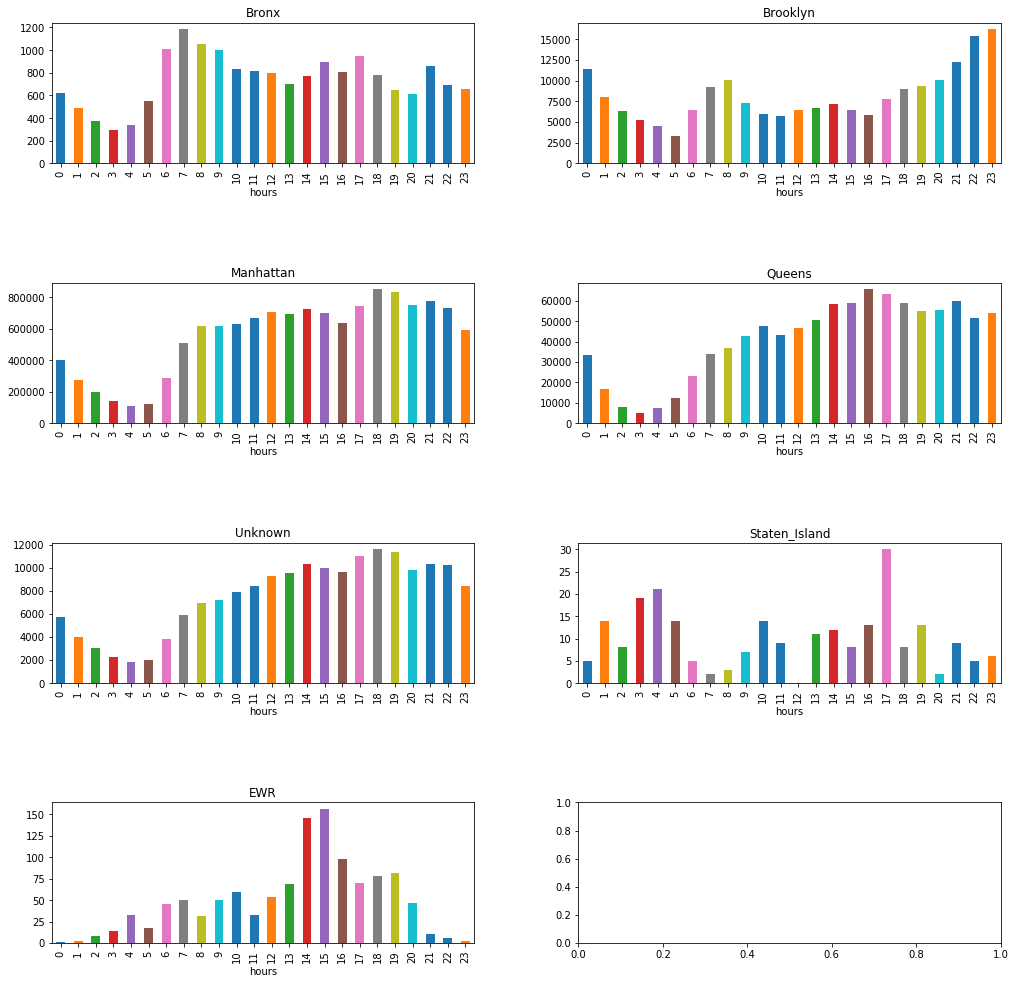

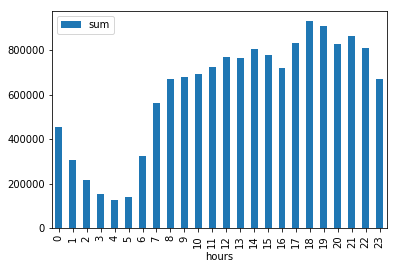

In [37]:
task_2('may')

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

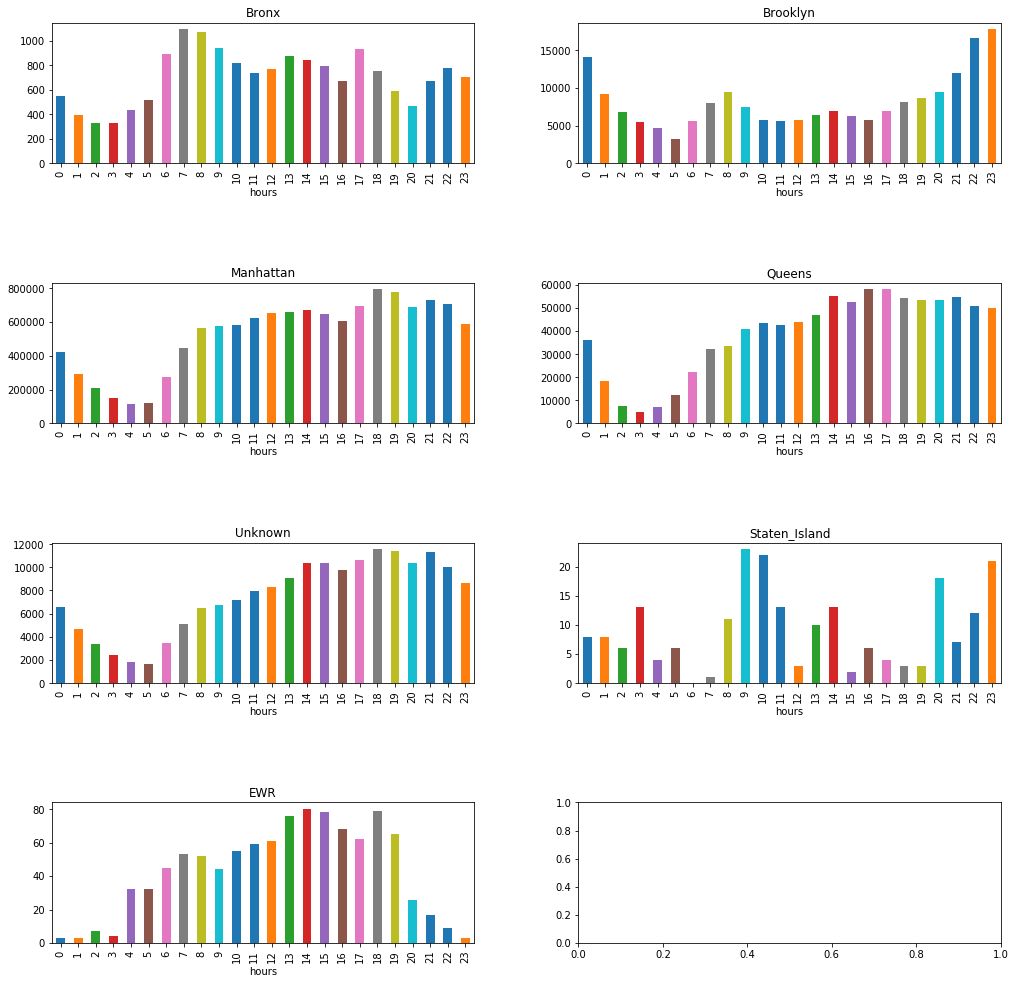

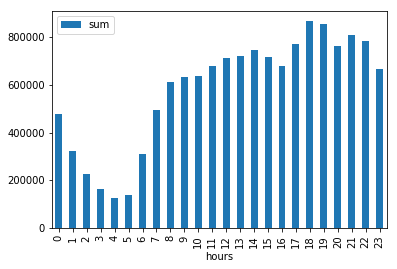

In [38]:
task_2('jun')

## RESULTS [RQ2]

From the last plot od every month, that describe the sum of the trips for each in all NYC, we can easly see that are all similar. Indeed the sum is maxim at 6 PM when the people leave office and go home. The other way around, during night at 4 or 5 AM with have the minimum.

For the same reasons of task 1, Manhattan dives the fenomenous.

From the plot about Bronx we can see we have a maximum at 8 and 9 AM when people go to work, probably in Manhattan.

From the plot about Brooklyn instead we have a maximum during "night" hour, in our opinion because the are several pubs or disco or night clubs are in this neighboor.

Queens has, more or less, the same plot as Manhattan, maybe because also in this zone there are some offices.

We have a few datas about Staten Island, we can not deduce specifi feature about this zone. 


**[RQ3]** Do the all trips last the same? Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).

We add the columns we will need to the function *read_cvs*. In particular we add the column **tpep_dropoff_datetime** and **trip_distance**

In [1]:
def read_csv(month,number):
    cmd= month+"=pandas.read_csv('yellow_tripdata_2018-0"+str(number)+".csv', sep=',',dtype={'tpep_pickup_datetime':str,'PULocationID':int,'tpep_dropoff_datetime':str , 'trip_distance': float}, usecols=['tpep_pickup_datetime','PULocationID','tpep_dropoff_datetime','trip_distance'])"
    exec(cmd)
    return eval(month)

The function *create_df* takes as input the month we want to consider and the respective number ro each month ('jan'=1;'feb'=2 etc). It compute the duration of each trips and it create a new DataFrame with the duration of the trips and trips distance.


From the data set we noticed that some values are "strange" and don't let us to make a precise plot. We decided to clean the dataset from the values in order to manage to work on the plots.
Indeed we decided to delete three kind on values:
The ones create a negative duration of the trips,
The ones have a trip distnce bigger than 200 miles,
The ones have a trip's duration larger than 10800 seconds, so larger than 3 hours.



In [2]:
def create_df(m,n):
    df=read_csv(m,n)
    df['tpep_pickup_datetime']=pandas.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
    df.loc[:,'month']=df['tpep_pickup_datetime'].dt.month
    df['tpep_dropoff_datetime']=pandas.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
    durata=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
    trip= df['trip_distance']
    del df['trip_distance']
    del df['tpep_dropoff_datetime']
    del df['tpep_pickup_datetime']
    df=df[df['month'] == n]
    del df['month']
    zone=pandas.read_csv('taxi _zone_lookup.csv', sep=',', usecols=['LocationID','Borough'])
    zone.rename(columns={'LocationID': 'PULocationID'}, inplace=True)
    df = pandas.merge(zone, df, on='PULocationID')
    del df['PULocationID']
    del zone
    df['trip_distance']= trip
    del trip
    df['DeltaTime']=durata
    seconds= df['DeltaTime'].dt.total_seconds()
    del df['DeltaTime']
    df['DeltaTime']=seconds
    df['DeltaTime']=pandas.to_numeric(df['DeltaTime'])
    df['trip_distance']=pandas.to_numeric(df['trip_distance'])
    df['DeltaTime']=pandas.to_numeric(df['DeltaTime'])
    df=df[df['trip_distance']<200]
    return df

In [6]:
df= pandas.DataFrame()
df["Borough"] = ""
df["trip_distance"] = ""
df["DeltaTime"] = ""

In [7]:
df1=create_df('jan',1)
df=pandas.concat([df,df1])
del df1

In [8]:
df1=create_df('feb',2)
df=pandas.concat([df,df1])
del df1

In [9]:
df1=create_df('mar',3)
df=pandas.concat([df,df1])
del df1

In [10]:
df1=create_df('apr',4)
df=pandas.concat([df,df1])
del df1

In [11]:
df1=create_df('may',5)
df=pandas.concat([df,df1])
del df1

In [12]:
df1=create_df('jun',6)
df=pandas.concat([df,df1])
del df1

In [13]:
df=df[df['DeltaTime']>0]
df=df[df['DeltaTime']<10800]

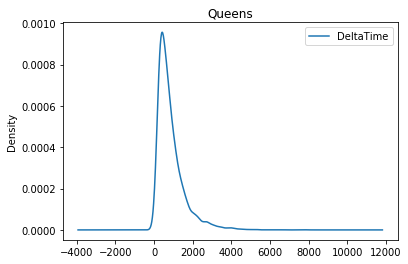

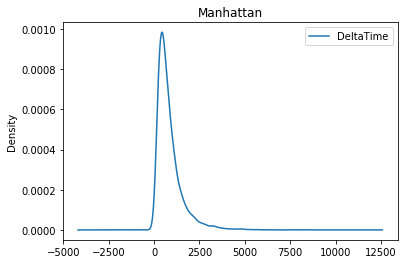

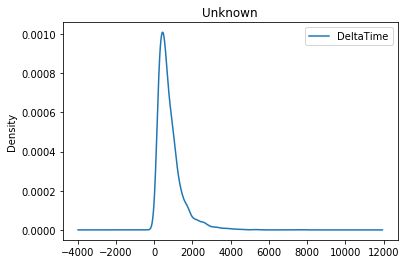

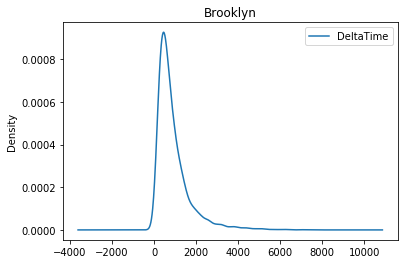

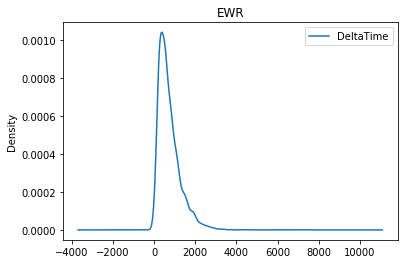

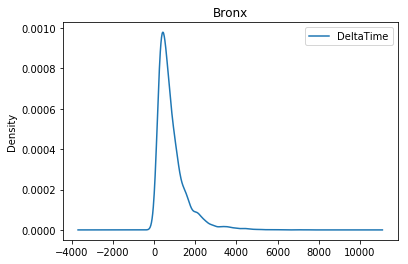

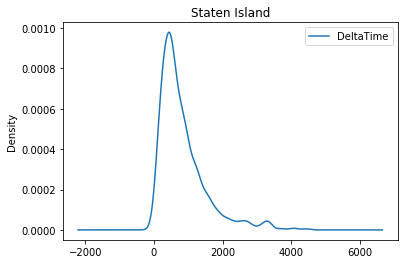

In [18]:
bor=["Queens","Manhattan","Unknown",'Brooklyn','EWR',"Bronx","Staten Island"]
for b in bor:
    df2=df[df['Borough']==b]
    del df2['Borough']
    a=df2.sample(6000, replace=True)
    a.plot(kind='density', title=b)
    del df2
    del a

## RESULTS [RQ3]

We compute the plots of the density of the duration for each Boroughs. 

The plots are all similar to  an chi-squared distribution plot. 
They all have a maximun near zero beacause the trips have a short duration.



__[RQ4]__ What is the most common way of payments? Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the Chi-squared test to see whether the method of payment is correlated to the borough. Then, comment the results.

Below we upload the data for each month and for the zones of NYC to correspondent DataFrame . We explicitly specify a type of data for each column of uploaded data in order to speed up this process.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
fields =['PULocationID','payment_type']
tzlp = pd.read_csv(r'C:\Users\Farid\Desktop\HW2-ADM-1\taxi _zone_lookup.csv', sep=',', dtype={'LocationID': int, 'Borough':str }, usecols=['LocationID','Borough'], index_col='LocationID')
jan = pd.read_csv(r'C:\Users\Farid\Desktop\HW2-ADM-1\yellow_tripdata_2018-01.csv', sep=',', dtype={fields[0]:int, fields[1]:int}, usecols=fields)
feb = pd.read_csv(r'C:\Users\Farid\Desktop\HW2-ADM-1\yellow_tripdata_2018-02.csv', sep=',', dtype={fields[0]:int, fields[1]:int}, usecols=fields)
mar = pd.read_csv(r'C:\Users\Farid\Desktop\HW2-ADM-1\yellow_tripdata_2018-03.csv', sep=',', dtype={fields[0]:int, fields[1]:int}, usecols=fields)
apr = pd.read_csv(r'C:\Users\Farid\Desktop\HW2-ADM-1\yellow_tripdata_2018-04.csv', sep=',', dtype={fields[0]:int, fields[1]:int}, usecols=fields)
may = pd.read_csv(r'C:\Users\Farid\Desktop\HW2-ADM-1\yellow_tripdata_2018-05.csv', sep=',', dtype={fields[0]:int, fields[1]:int}, usecols=fields)
jun = pd.read_csv(r'C:\Users\Farid\Desktop\HW2-ADM-1\yellow_tripdata_2018-06.csv', sep=',', dtype={fields[0]:int, fields[1]:int}, usecols=fields)

Below we create auxilary dictionaries. They will be used to fill the table of frequencies. 
__dictmonth__ is a dictionary where key is the id number of each zone and value is the list of payment types for each trip.
__dictmonthset__ is a dictionary where key is the id number for each zone and value is the list of payment types used during the trips in that zone.

In [4]:
frames=[jan,feb,mar,apr,may,jun]
dictmonth={}
dictmonthset={}
for i in frames:
    month = i
    monthdic = month.to_dict('list')
    lenmonth = len(monthdic['PULocationID'])
    for i in range(lenmonth):
       if (monthdic['PULocationID'])[i] not in dictmonth: dictmonth[month['PULocationID'][i]] = []
       else: dictmonth[(monthdic['PULocationID'])[i]].append((monthdic['payment_type'])[i])
    for i in dictmonth:
        dictmonthset[i]=set(dictmonth[i])
del month

Below we compute a dataframe of observed frequencies of payments for each zone of NYC. Index column of this dataframe<br> consists of id numbers of zones where the clients were picked up. The rest of columns indicates the type of payment.<br>
A numeric code signifying how the passenger paid for the trip:<br>
1 = Credit card<br>
2 = Cash<br>
3 = No charge<br>
4 = Dispute<br>
5 = Unknown<br>
6 = Voided trip<br>
Then we compute a dataframe of frequencies of payments for each borough of NYC.<br>
Then we plot the bar chart and the table of frequencies for boroughs.

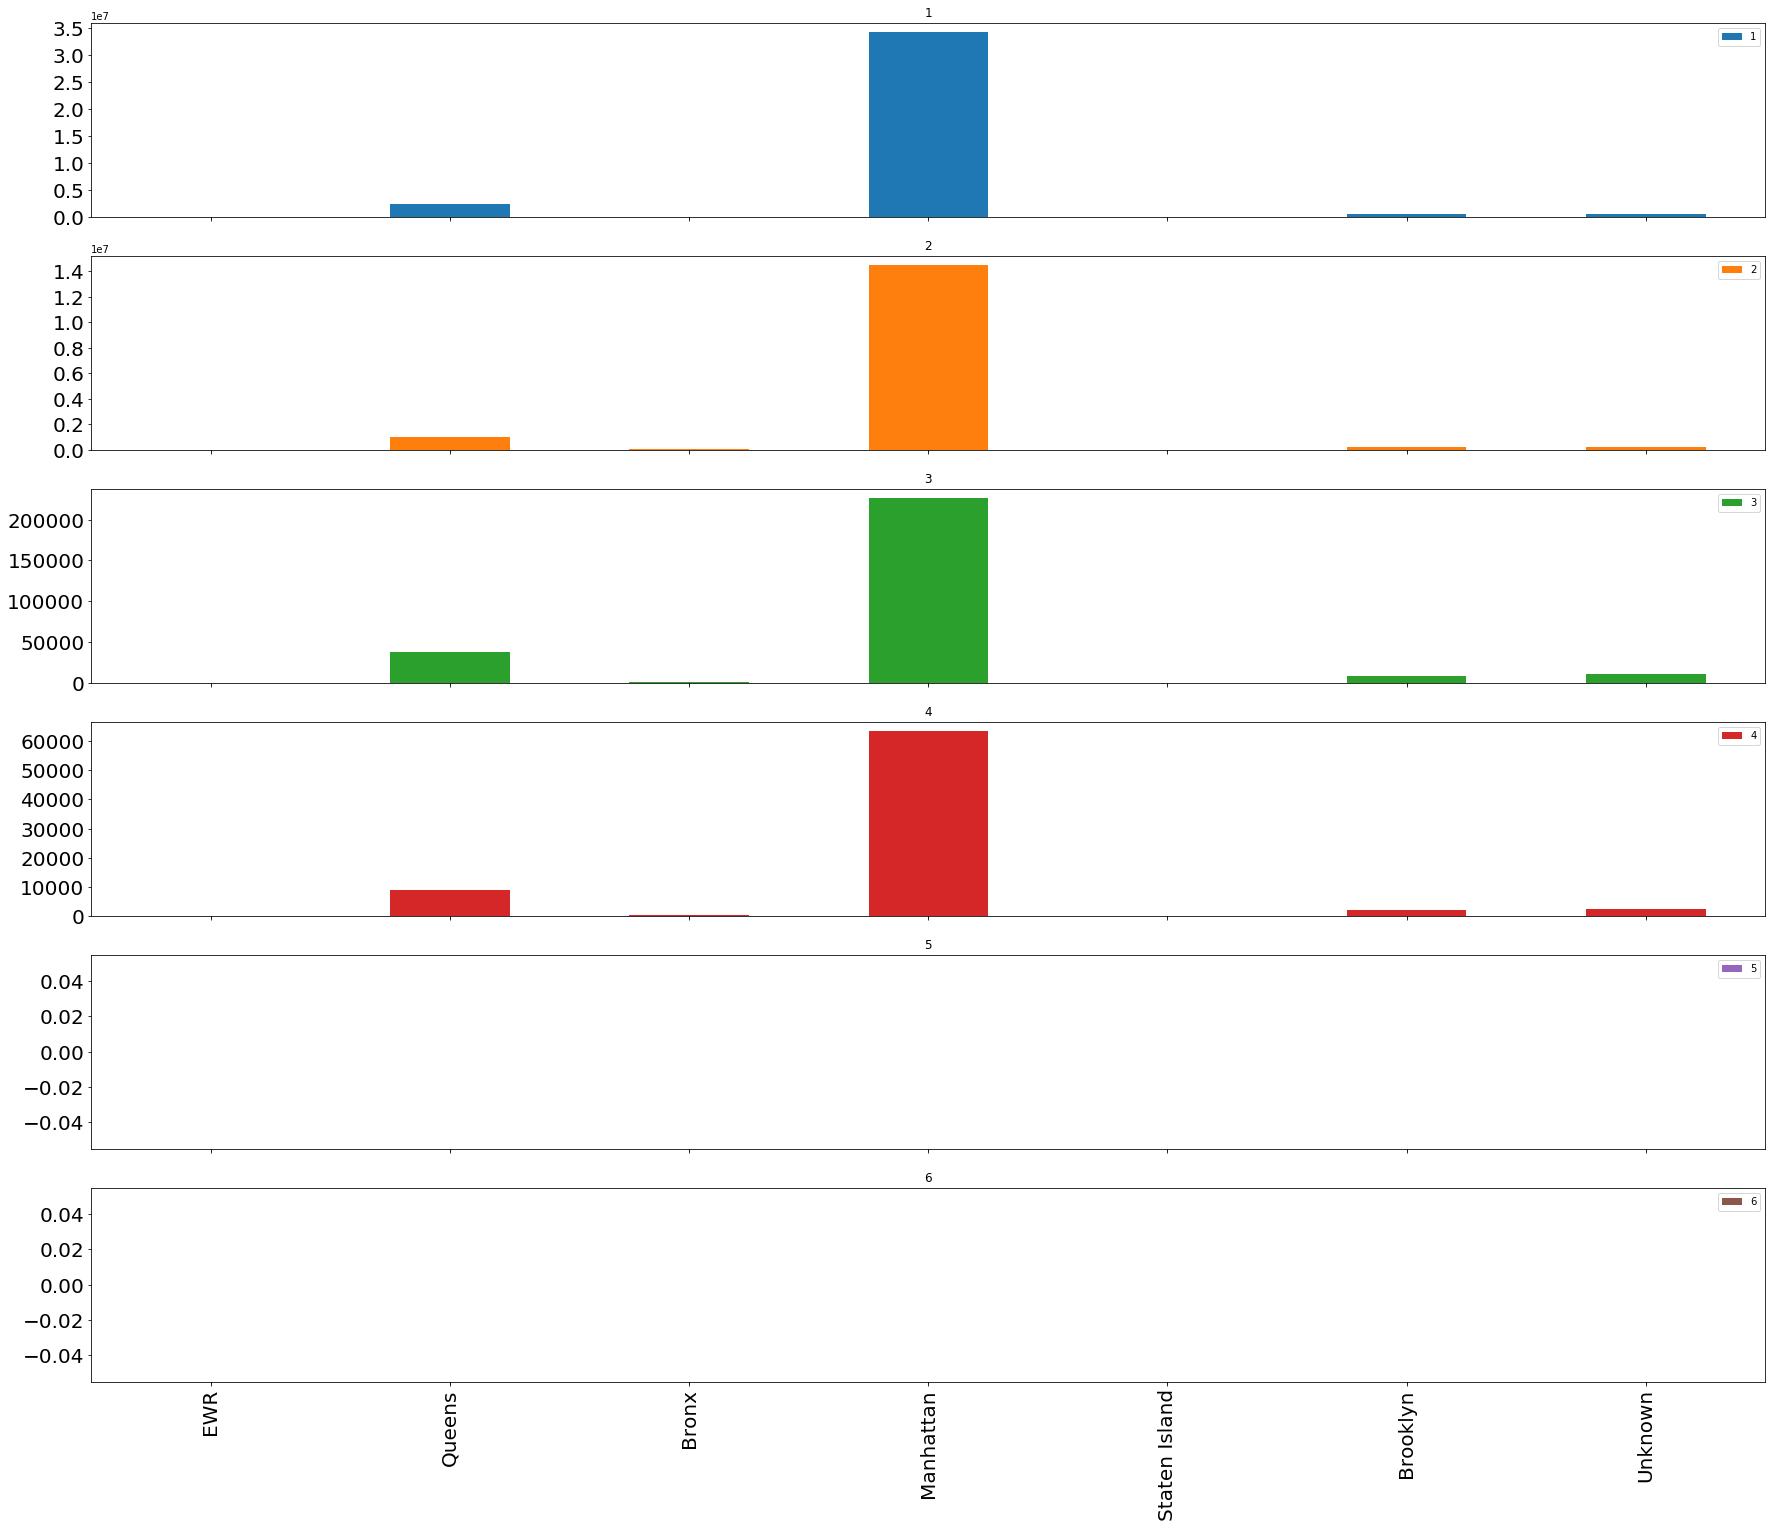

                        1           2         3        4  5  6       total
EWR                3035.0       551.0     220.0     47.0  0  0      3853.0
Queens          2311221.0   1000663.0   37294.0   8935.0  0  0   3358113.0
Bronx             27781.0     26112.0    1514.0    360.0  0  0     55767.0
Manhattan      34188753.0  14480606.0  226799.0  63614.0  0  0  48959772.0
Staten Island       427.0       308.0      48.0     13.0  0  0       796.0
Brooklyn         441860.0    230503.0    8788.0   1923.0  0  0    683074.0
Unknown          595316.0    255817.0   10652.0   2312.0  0  0    864097.0
total          37568393.0  15994560.0  285315.0  77204.0  0  0  53925472.0


In [5]:
month2 = pd.DataFrame(0, index=sorted(dictmonth)+['total'], columns=[1, 2, 3, 4, 5, 6,'total'], dtype=int)
monthbor = pd.DataFrame(0, index=['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn', 'Unknown', 'total'], columns=[1, 2, 3, 4, 5, 6,'total'], dtype=int)
for i in dictmonthset:
    for j in dictmonthset[i]:
        month2.loc[i, j] = float(dictmonth[i].count(j)) #float() is used to avoid the overflow of integer values
for j in range(1,7):
    for i in dictmonth:
        monthbor.loc[tzlp.loc[i, 'Borough'], j] += month2.loc[i, j]
mbr=['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn', 'Unknown']
for i in mbr:
    monthbor.loc[i, 'total']=sum(monthbor.loc[i])
for i in range(1,7):
    monthbor.loc['total', i]=sum(monthbor[i])

if sum(monthbor['total'])==sum(monthbor.loc['total']):
            monthbor.loc['total', 'total']=sum(monthbor['total'])
else:       monthbor.loc['total', 'total']= 'error'
mbbor = pd.DataFrame(0, index=['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn', 'Unknown'], columns=[1, 2, 3, 4, 5, 6], dtype=int)
month2=monthbor #This step appeared during fixing of the code in order to avoid other corrections
for i in mbr:
    for j in range(1,7):
        mbbor.loc[i,j]=monthbor.loc[i,j]
mbbor.plot.bar(subplots=True, figsize=(30,25), fontsize=20)
plt.show()
print(month2)

$\chi^2$ test:
    Suitable null and alternative hypotheses might be:
    
    $H_{0}$: There is not any dependacy among the boroughs and the types of payments
    $H_{1}$: There is some dependacy among the boroughs and the types of payments
The expected numbers (under the null hypothesis) in each cell are equal to
$\frac{row\,total\,*\,column\,total}{grand\,total}$
Below we compute a dataframe consisting of expected numbers.

In [6]:
month3= pd.DataFrame(0, index=mbr, columns=[1, 2, 3, 4, 5, 6], dtype=int)
for i in mbr:
    for j in range(1,7):
        mn2it=month2.loc[i, "total"]
        mn2tj=month2.loc["total", j]
        mn2tt=month2.loc['total', 'total']
        month3.loc[i,j]= (mn2it*mn2tj)/mn2tt

To calculate the $\chi^2$ statistic the value of $\frac{(observed\,frequency\,-\,expected\,frequency)^2}{expected\,frequency}$ needs to be calculated for each cell in the table. Then we sum all the values in each cell of an obtained dataframe.

In [7]:
month4= pd.DataFrame(0, index=mbr, columns=[1, 2, 3, 4, 5, 6], dtype=int)
for i in mbr:
    for j in range(1,7):
        mn2ij=month2.loc[i,j]
        mn3ij=month3.loc[i, j]
        if mn3ij!=0:  month4.loc[i, j]=((mn2ij-mn3ij)**2)/mn3ij
        else: month4.loc[i,j] = 0
print('chi^2=', sum(month4))

chi^2= 21


# RESULTS [RQ4]
What is the most common way of payments?
It can be said for sure that most often people pay by credit card. The number of payment by credit card is more than two times bigger than the number of payment by cash ('the second biggest result'). There was not any unknown type of payments or voided trips during the first part of the year 2018.
Concerning the $\chi^2$ test, we obtained the result value which is equal to $21$. Considering that there is $5$ degrees of freedom the __p-value__ is __0.0081__. The result is significant at __p < 0.05__. So we do not observe any correlation between the payment types and boroughs.

### [RQ5] 
We computed the correlation between distance and duration of every trip in order to study if long distance correlate with duration. 
We expect to see that duration increases with distance linearly and an exception to this could be explained by trips in traffic that have high duration and small distance: we expect that borough with lot of traffic such as Manhattan will have scatter points closer to the axis of duration.
We saved the correlation for each month in an array and computed the mean of correlations through months.

The analysis was done on january then repeated for every month and the results through months was compared in order to study general behavior.

In [3]:
def read_csv(month,number):
    cmd= month+"=pandas.read_csv('yellow_tripdata_2018-0"+str(number)+".csv', sep=',',dtype={'tpep_pickup_datetime':str,'PULocationID':int,'tpep_dropoff_datetime':str , 'trip_distance': float}, usecols=['tpep_pickup_datetime','PULocationID','tpep_dropoff_datetime','trip_distance'])"
    exec(cmd)
    return eval(month)

In [4]:
def inSeconds(dt1):
    return  dt1.seconds

In [5]:
correlations=[0,0,0,0,0,0]

In [6]:
month=read_csv('jan',1)
month=month.loc[(month['trip_distance']!=0)]
month.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
zone=pd.read_csv('taxi_zone_lookup.csv', sep=',', usecols=['LocationID','Borough'])
month = pd.merge(zone, month, on='LocationID')

In [7]:
month['tpep_dropoff_datetime']=pandas.to_datetime(month['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
month['tpep_pickup_datetime']=pandas.to_datetime(month['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [8]:
durata=month['tpep_dropoff_datetime']-month['tpep_pickup_datetime']

In [9]:
del month['tpep_pickup_datetime']
del month['tpep_dropoff_datetime']

In [10]:
durata=pandas.DataFrame(durata)
durata=durata[0].apply(inSeconds)
month['DeltaTime']=durata
month=month.loc[(month['DeltaTime']>60)]
month=month.loc[(month['DeltaTime']<10800)]

In [11]:
Q1=month.trip_distance.quantile(0.25)
Q3=month.trip_distance.quantile(0.75)
W=Q3-Q1
bound=Q3+(4.5*W)
month=month.loc[(month['trip_distance']<bound)]

The dataset was cleaned from wrong records such as trips with **distance=0** or **fare amount<2.5** 

then we deleted the uoutliers of the variable *distance* by bounding at level **Q3+(Q3-Q1)*4.5**.

Trips with duration less than 1 minute and higher than 3 hours was deleted from the dataset because they were source of distortion.

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Duration')

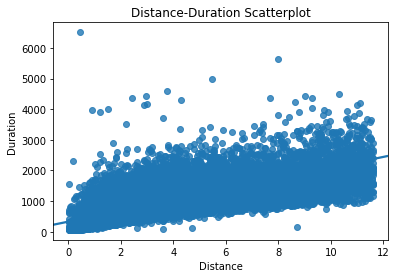

In [12]:
sns.regplot("trip_distance", "DeltaTime", data=month.sample(50000))
plt.title('Distance-Duration Scatterplot')
plt.xlabel('Distance')
plt.ylabel('Duration')

We plotted the *Scatterplot* with the LSM line that shows the average behavior.

Just by seeing the scatterplot we can say that there is a strong correlation between *Distance* and *Duration* and there is linear dipendence between these two variables.

The point's cloud is closer to 'Distance' axis and this means that, even if they grows linearly, trips with very long distance doesn't have very high duration: this could be because long distance trip are done on highways, in which there is not traffic and takes less time compared to the distance.

In [13]:
corrMonth=pearsonr(month['trip_distance'], month['DeltaTime'])
print('Correlation is ',end='')
print(corrMonth[0],end='')
print(' with significance of ',end='')
print(corrMonth[1])
if corrMonth[1]<0.05:
    print('so we accept H0')
else:
    print('so we reject H0')
correlations[0]=corrMonth[0]

Correlation is 0.7611629654732106 with significance of 0.0
so we accept H0


We computed the Pearson's coefficient and its significance in order to see that the correlation is not casual.

As seen on the scatterplot there is a strong correlation and the p-value <0.05 let us accept *H0* that correlation is true and not due to casual association.

We repeated the analysis for every month and saved correlation in an array in order to compute the mean of correlation through months

In [14]:
month=read_csv('feb',2)
month=month.loc[(month['trip_distance']!=0)]
month.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
zone=pd.read_csv('taxi_zone_lookup.csv', sep=',', usecols=['LocationID','Borough'])
month = pd.merge(zone, month, on='LocationID')

In [15]:
month['tpep_dropoff_datetime']=pandas.to_datetime(month['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
month['tpep_pickup_datetime']=pandas.to_datetime(month['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [16]:
durata=month['tpep_dropoff_datetime']-month['tpep_pickup_datetime']

In [17]:
del month['tpep_pickup_datetime']
del month['tpep_dropoff_datetime']

In [18]:
durata=pandas.DataFrame(durata)
durata=durata[0].apply(inSeconds)
month['DeltaTime']=durata
month=month.loc[(month['DeltaTime']>60)]
month=month.loc[(month['DeltaTime']<10800)]

In [19]:
Q1=month.trip_distance.quantile(0.25)
Q3=month.trip_distance.quantile(0.75)
W=Q3-Q1
bound=Q3+(3*W)
month=month.loc[(month['trip_distance']<bound)]

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Duration')

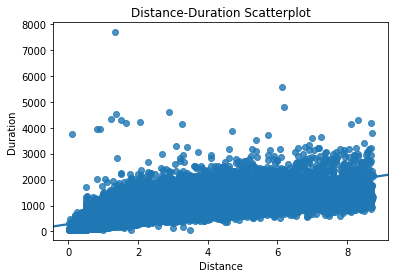

In [20]:
sns.regplot("trip_distance", "DeltaTime", data=month.sample(50000))
plt.title('Distance-Duration Scatterplot')
plt.xlabel('Distance')
plt.ylabel('Duration')

In [21]:
corrMonth=pearsonr(month['trip_distance'], month['DeltaTime'])
print('Correlation is ',end='')
print(corrMonth[0],end='')
print(' with significance of ',end='')
print(corrMonth[1])
if corrMonth[1]<0.05:
    print('so we accept H0')
else:
    print('so we reject H0')
correlations[1]=corrMonth[0]

Correlation is 0.7524313027999904 with significance of 0.0
so we accept H0


In [22]:
month=read_csv('mar',3)
month=month.loc[(month['trip_distance']!=0)]
month.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
zone=pd.read_csv('taxi_zone_lookup.csv', sep=',', usecols=['LocationID','Borough'])
month = pd.merge(zone, month, on='LocationID')

In [23]:
month['tpep_dropoff_datetime']=pandas.to_datetime(month['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
month['tpep_pickup_datetime']=pandas.to_datetime(month['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [24]:
durata=month['tpep_dropoff_datetime']-month['tpep_pickup_datetime']

In [25]:
del month['tpep_pickup_datetime']
del month['tpep_dropoff_datetime']

In [26]:
durata=pandas.DataFrame(durata)
durata=durata[0].apply(inSeconds)
month['DeltaTime']=durata
month=month.loc[(month['DeltaTime']>60)]
month=month.loc[(month['DeltaTime']<10800)]

In [27]:
Q1=month.trip_distance.quantile(0.25)
Q3=month.trip_distance.quantile(0.75)
W=Q3-Q1
bound=Q3+(3*W)
month=month.loc[(month['trip_distance']<bound)]

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Duration')

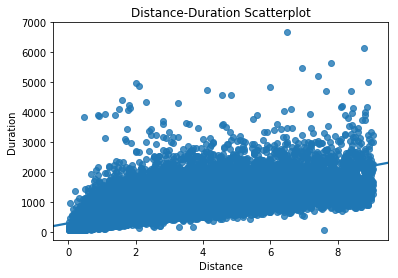

In [28]:
sns.regplot("trip_distance", "DeltaTime", data=month.sample(50000))
plt.title('Distance-Duration Scatterplot')
plt.xlabel('Distance')
plt.ylabel('Duration')

In [29]:
corrMonth=pearsonr(month['trip_distance'], month['DeltaTime'])
print('Correlation is ',end='')
print(corrMonth[0],end='')
print(' with significance of ',end='')
print(corrMonth[1])
if corrMonth[1]<0.05:
    print('so we accept H0')
else:
    print('so we reject H0')
correlations[2]=corrMonth[0]

Correlation is 0.7403976198970568 with significance of 0.0
so we accept H0


In [30]:
month=read_csv('apr',4)
month=month.loc[(month['trip_distance']!=0)]
month.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
zone=pd.read_csv('taxi_zone_lookup.csv', sep=',', usecols=['LocationID','Borough'])
month = pd.merge(zone, month, on='LocationID')

In [31]:
month['tpep_dropoff_datetime']=pandas.to_datetime(month['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
month['tpep_pickup_datetime']=pandas.to_datetime(month['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [32]:
durata=month['tpep_dropoff_datetime']-month['tpep_pickup_datetime']

In [33]:
del month['tpep_pickup_datetime']
del month['tpep_dropoff_datetime']

In [34]:
durata=pandas.DataFrame(durata)
durata=durata[0].apply(inSeconds)
month['DeltaTime']=durata
month=month.loc[(month['DeltaTime']>60)]
month=month.loc[(month['DeltaTime']<10800)]

In [35]:
Q1=month.trip_distance.quantile(0.25)
Q3=month.trip_distance.quantile(0.75)
W=Q3-Q1
bound=Q3+(3*W)
month=month.loc[(month['trip_distance']<bound)]

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Duration')

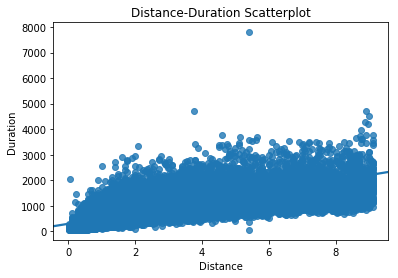

In [36]:
sns.regplot("trip_distance", "DeltaTime", data=month.sample(50000))
plt.title('Distance-Duration Scatterplot')
plt.xlabel('Distance')
plt.ylabel('Duration')

In [37]:
corrMonth=pearsonr(month['trip_distance'], month['DeltaTime'])
print('Correlation is ',end='')
print(corrMonth[0],end='')
print(' with significance of ',end='')
print(corrMonth[1])
if corrMonth[1]<0.05:
    print('so we accept H0')
else:
    print('so we reject H0')
correlations[3]=corrMonth[0]

Correlation is 0.7396548376898374 with significance of 0.0
so we accept H0


In [38]:
month=read_csv('may',5)
month=month.loc[(month['trip_distance']!=0)]
month.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
zone=pd.read_csv('taxi_zone_lookup.csv', sep=',', usecols=['LocationID','Borough'])
month = pd.merge(zone, month, on='LocationID')

In [39]:
month['tpep_dropoff_datetime']=pandas.to_datetime(month['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
month['tpep_pickup_datetime']=pandas.to_datetime(month['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [40]:
durata=month['tpep_dropoff_datetime']-month['tpep_pickup_datetime']

In [41]:
del month['tpep_pickup_datetime']
del month['tpep_dropoff_datetime']

In [42]:
durata=pandas.DataFrame(durata)
durata=durata[0].apply(inSeconds)
month['DeltaTime']=durata
month=month.loc[(month['DeltaTime']>60)]
month=month.loc[(month['DeltaTime']<10800)]

In [43]:
Q1=month.trip_distance.quantile(0.25)
Q3=month.trip_distance.quantile(0.75)
W=Q3-Q1
bound=Q3+(3*W)
month=month.loc[(month['trip_distance']<bound)]

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Duration')

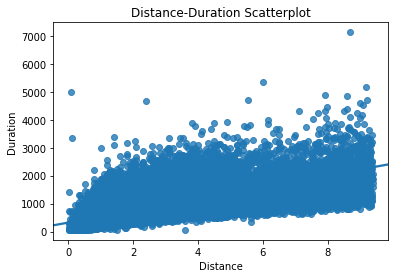

In [44]:
sns.regplot("trip_distance", "DeltaTime", data=month.sample(50000))
plt.title('Distance-Duration Scatterplot')
plt.xlabel('Distance')
plt.ylabel('Duration')

In [45]:
corrMonth=pearsonr(month['trip_distance'], month['DeltaTime'])
print('Correlation is ',end='')
print(corrMonth[0],end='')
print(' with significance of ',end='')
print(corrMonth[1])
if corrMonth[1]<0.05:
    print('so we accept H0')
else:
    print('so we reject H0')
correlations[4]=corrMonth[0]

Correlation is 0.7224422086415737 with significance of 0.0
so we accept H0


In [46]:
month=read_csv('jun',6)
month=month.loc[(month['trip_distance']!=0)]
month.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
zone=pd.read_csv('taxi_zone_lookup.csv', sep=',', usecols=['LocationID','Borough'])
month = pd.merge(zone, month, on='LocationID')

In [47]:
month['tpep_dropoff_datetime']=pandas.to_datetime(month['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
month['tpep_pickup_datetime']=pandas.to_datetime(month['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [48]:
durata=month['tpep_dropoff_datetime']-month['tpep_pickup_datetime']

In [49]:
del month['tpep_pickup_datetime']
del month['tpep_dropoff_datetime']

In [50]:
durata=pandas.DataFrame(durata)
durata=durata[0].apply(inSeconds)
month['DeltaTime']=durata
month=month.loc[(month['DeltaTime']>60)]
month=month.loc[(month['DeltaTime']<10800)]

In [51]:
Q1=month.trip_distance.quantile(0.25)
Q3=month.trip_distance.quantile(0.75)
W=Q3-Q1
bound=Q3+(3*W)
month=month.loc[(month['trip_distance']<bound)]

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Duration')

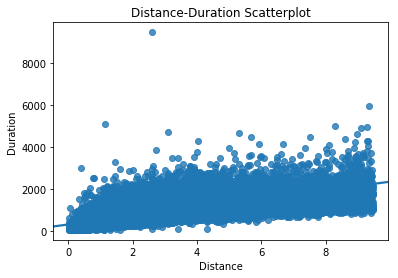

In [52]:
sns.regplot("trip_distance", "DeltaTime", data=month.sample(50000))
plt.title('Distance-Duration Scatterplot')
plt.xlabel('Distance')
plt.ylabel('Duration')

In [53]:
corrMonth=pearsonr(month['trip_distance'], month['DeltaTime'])
print('Correlation is ',end='')
print(corrMonth[0],end='')
print(' with significance of ',end='')
print(corrMonth[1])
if corrMonth[1]<0.05:
    print('so we accept H0')
else:
    print('so we reject H0')
correlations[5]=corrMonth[0]

Correlation is 0.7316485176463478 with significance of 0.0
so we accept H0


In [54]:
print(correlations)

[0.7611629654732106, 0.7524313027999904, 0.7403976198970568, 0.7396548376898374, 0.7224422086415737, 0.7316485176463478]


In [56]:
somma=0
for i in correlations:
    somma+=i
mean=somma/6 
print("Average correlation through months is "+str(mean))

Average correlation through months is 0.7412895753580027


### Results [RQ5]
Computing the average correlation through months we see that there is always association between *Duration* and *Distance*, and this is what we were expecting.
Every month has the same behavior for the closeness to 'Distance' axis too

# Core Research Questions

### [CRQ1]
We had to study how *fare for miles* changes across NY's boroughs.
In order to do it we created a new variable **P=Fare amount/Distance** ad we studied the distribution of the variable P for each borough: first we computed mean and standard deviation, then we plotted the distribution.

We started studying the month of january then we repeted the analysis for evry month.

In [80]:
def read_csv(month,number):
    cmd= month+"=pandas.read_csv('yellow_tripdata_2018-0"+str(number)+".csv', sep=',',dtype={'fare_amount':float,'PULocationID':int, 'trip_distance': float, 'tpep_dropoff_datetime':str, 'tpep_pickup_datetime':str}, usecols=['fare_amount','PULocationID','trip_distance','tpep_pickup_datetime','tpep_dropoff_datetime'])"
    exec(cmd)
    return eval(month)

In [81]:
def inSeconds(dt1):
    return  dt1.seconds

In [82]:
zoneName=('EWR','Queens','Bronx','Manhattan','Staten Island','Brooklyn')

In [83]:
month=read_csv('jan',1)
month=month.loc[(month['trip_distance']!=0)]
month=month.loc[month['fare_amount']>2.5]
month.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
zone=pd.read_csv('taxi_zone_lookup.csv', sep=',', usecols=['LocationID','Borough'])
month = pd.merge(zone, month, on='LocationID')

In [84]:
Q1=month.trip_distance.quantile(0.25)
Q3=month.trip_distance.quantile(0.75)
W=Q3-Q1
bound=Q3+(1.5*W)
month=month.loc[(month['trip_distance']<bound)]

The dataset was cleaned from wrong records such as trips with **distance=0** or **fare amount<2.5** 

then we deleted the uoutliers of the variable *distance* by bounding at level **Q3+(Q3-Q1)*1.5**.

Trips with duration less than 1 minute and higher than 3 hours was deleted from the dataset because they were source of distortion.

In [85]:
month['tpep_dropoff_datetime']=pandas.to_datetime(month['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
month['tpep_pickup_datetime']=pandas.to_datetime(month['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
durata=month['tpep_dropoff_datetime']-month['tpep_pickup_datetime']
del month['tpep_pickup_datetime']
del month['tpep_dropoff_datetime']

In [86]:
durata=pandas.DataFrame(durata)
durata=durata[0].apply(inSeconds)
month['DeltaTime']=durata
month=month.loc[(month['DeltaTime']>60)]
month=month.loc[(month['DeltaTime']<10800)]

In [87]:
P=month['fare_amount']/month['trip_distance']
month['P']=P
newP=month['P']/month['DeltaTime']
month['New P']=newP

In [88]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Mean of P for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.mean(subset['P']), 3))

Mean of P for EWR is:466.889
Mean of P for Queens is:8.278
Mean of P for Bronx is:6.237
Mean of P for Manhattan is:6.482
Mean of P for Staten Island is:5.815
Mean of P for Brooklyn is:6.164


In [89]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Standard deviation of P for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.stdev(subset['P']), 3))

Standard deviation of P for EWR is:1129.349
Standard deviation of P for Queens is:88.974
Standard deviation of P for Bronx is:11.234
Standard deviation of P for Manhattan is:16.464
Standard deviation of P for Staten Island is:3.965
Standard deviation of P for Brooklyn is:76.175


We can see that the borough with highest mean is EWR, with a standard deviation of 1129; other boroughs have a mean around 6.5 with a standard deviation around 40.
We can say that EWR is the most expensive district, but the standard deviation in very high so the mean could be distorted by outliers.
Staten island seems to be the cheapest borough with a low standard deviation.

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

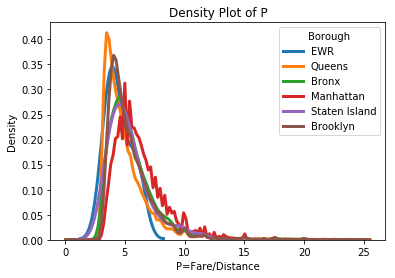

In [90]:
month=month.loc[(month['P']<25)]
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    
    sns.distplot(subset['P'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = zona)
plt.legend(prop={'size': 10}, title = 'Borough')
plt.title('Density Plot of P')
plt.xlabel('P=Fare/Distance')
plt.ylabel('Density')

We plotted the distribution of the variable P for each borough with different colours: as we can see the mean is around **5**.
Manhattan has more fluctuation then other boroughs but in general all the boroughs have the same distribution

We had to see if there were significative differences between the means through boroughs, so we computed the *T test* for every combination of boroughs and we computed the p-value to test the hypotesis *H0* that boroughs has the same mean.

In [91]:
t={}
p={}
for i in range(0,6):
    subset = month[month['Borough'] == zoneName[i]]
    for j in range(i+1,6):
            subset2 = month[month['Borough'] == zoneName[j]]
            t["t{0}".format(i)+"-{0}".format(j)]=stats.ttest_ind(subset['P'],subset2['P'])[0]
            p["p{0}".format(i)+"-{0}".format(j)]=stats.ttest_ind(subset['P'],subset2['P'])[1]*2
print('Combination   t test')
for com, tt in t.items():
    print('{}      {}'.format(com, tt))
print()
print('Combination   p value')
for com, pv in p.items():
    print('{}      {}'.format(com, pv))

Combination   t test
t0-1      -0.7167829529779185
t0-2      -1.329181856016964
t0-3      -2.123578585445834
t0-4      -1.1978631513376987
t0-5      -1.243696724406757
t1-2      -15.048539805344957
t1-3      -158.31397925099245
t1-4      -0.6167922302339226
t1-5      -28.682568112274183
t2-3      -21.29821016553921
t2-4      0.969857675949875
t2-5      6.968015655300807
t3-4      3.1303036179968213
t3-5      108.74150796506711
t4-5      -0.3736187859008983

Combination   p value
p0-1      0.9470196085960942
p0-2      0.3676920718472488
p0-3      0.06741086208279866
p0-4      0.4716851920077498
p0-5      0.42722962334611975
p1-2      8.035409350783979e-51
p1-3      0.0
p1-4      1.0747465270378598
p1-5      3.3048985019277596e-180
p2-3      2.37544181750445e-100
p2-4      0.6643239126710936
p2-5      6.474862666339434e-12
p3-4      0.003492527928351455
p3-5      0.0
p4-5      1.4173778709439033


As we can see from the p-value of most of the combination, we had to refuse null hypotesis. This is because the assumption in order to run *T-test* is that the variable follows a normal distribution, assumption not satisfied by the variable *P*.

Different values of the variable P through boroughs could be explained from the traffic that taxis finds on their way. In order to mitigate this effect we divided the variable *P* by trip duration that is *dropoff datetime*-*pickup datetime* expressed in seconds.

We ran the same analysis done before for variable *P*, computing mean, standard deviation, plotting ditribution and running T-test.

In [92]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Mean of NewP for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.mean(subset['New P']), 3))

Mean of NewP for EWR is:0.026
Mean of NewP for Queens is:0.014
Mean of NewP for Bronx is:0.015
Mean of NewP for Manhattan is:0.016
Mean of NewP for Staten Island is:0.014
Mean of NewP for Brooklyn is:0.014


In [93]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Standard deviation of NewP for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.stdev(subset['New P']), 3))

Standard deviation of NewP for EWR is:0.02
Standard deviation of NewP for Queens is:0.019
Standard deviation of NewP for Bronx is:0.022
Standard deviation of NewP for Manhattan is:0.018
Standard deviation of NewP for Staten Island is:0.015
Standard deviation of NewP for Brooklyn is:0.018


Division by duration has mitigated the effect of traffic and now all means are around 0 and are more similar among them:
mean of *NewP* through borough is around 0.22 except from EWR that has a very high value as before: the division by duration didn't have a great effect on EWR records and this is normal because we don't expect traffic jam near the airport.
Standard deviation in EWR is still high and this could be caused by outliers; for other boroughs standard deviation is around 0.35 that is closer to the new mean compared to how close was the standard deviation to the original mean: this means that division by duration has worked on mitigating effect of traffic on the fare amount.

C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

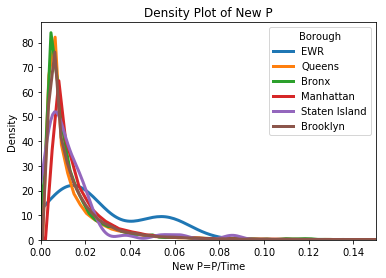

In [94]:
plt.xlim(0,0.15)
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    
    sns.distplot(subset['New P'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = zona)
plt.legend(prop={'size': 10}, title = 'Borough')
plt.title('Density Plot of New P')
plt.xlabel('New P=P/Time')
plt.ylabel('Density')

The distribution of the variable *NewP* is closer to 0 because of the division by duration, and still no distribution of *NewP* for each borough follows a gaussian bell: this tells us that assumption for T-test are not satisfied but we ran the test in order to see if empirical results endorse our hypotesis

In [95]:
Newt={}
Newp={}
for i in range(0,6):
    subset = month[month['Borough'] == zoneName[i]]
    for j in range(i+1,6):
            subset2 = month[month['Borough'] == zoneName[j]]
            Newt["Newt{0}".format(i)+"-{0}".format(j)]=stats.ttest_ind(subset['New P'],subset2['New P'])[0]
            Newp["Newp{0}".format(i)+"-{0}".format(j)]=stats.ttest_ind(subset['New P'],subset2['New P'])[1]*2
print('Combination   t test')
for com, tt in Newt.items():
    print('{}      {}'.format(com, tt))
print()
print('Combination   p value')
for com, pv in Newp.items():
    print('{}      {}'.format(com, pv))

Combination   t test
Newt0-1      1.625609442290435
Newt0-2      1.2535315936143905
Newt0-3      1.4759362850044113
Newt0-4      1.861557749782158
Newt0-5      1.6729559443353803
Newt1-2      -5.706980931523
Newt1-3      -35.57673872003813
Newt1-4      -0.025956944529714827
Newt1-5      -5.365452673263502
Newt2-3      -1.9461123077217823
Newt2-4      0.504996136428113
Newt2-5      4.207059073474516
Newt3-4      0.8207810346861284
Newt3-5      25.231723703379167
Newt4-5      -0.16677277480476116

Combination   p value
Newp0-1      0.20807220344263241
Newp0-2      0.42013683219805414
Newp0-3      0.2799220805636099
Newp0-4      0.1354702836381279
Newp0-5      0.18867968396345375
Newp1-2      2.3064524667298848e-08
Newp1-3      6.770404688606382e-277
Newp1-4      1.9585834699384934
Newp1-5      1.6169707244161147e-07
Newp2-3      0.10328257689552273
Newp2-4      1.2271653399170799
Newp2-5      5.179548045970742e-05
Newp3-4      0.8235420595444631
Newp3-5      3.6448528658948694e-140
Newp4

As we expected most of t-test are not significant and only 5 of the p-value are <0.05 and let us accept null hypotesis that means are different. This is because the assumption of normal distribution of variable *NewP* are not satisfied so we should not run t-test.

We repeated all analysis done on january with all months

In [96]:
month=read_csv('feb',2)
month=month.loc[(month['trip_distance']!=0)]
month=month.loc[month['fare_amount']>2.5]
month.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
zone=pd.read_csv('taxi_zone_lookup.csv', sep=',', usecols=['LocationID','Borough'])
month = pd.merge(zone, month, on='LocationID')

In [97]:
Q1=month.trip_distance.quantile(0.25)
Q3=month.trip_distance.quantile(0.75)
W=Q3-Q1
bound=Q3+(1.5*W)
month=month.loc[(month['trip_distance']<bound)]

In [98]:
month['tpep_dropoff_datetime']=pandas.to_datetime(month['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
month['tpep_pickup_datetime']=pandas.to_datetime(month['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
durata=month['tpep_dropoff_datetime']-month['tpep_pickup_datetime']
del month['tpep_pickup_datetime']
del month['tpep_dropoff_datetime']

In [99]:
durata=pandas.DataFrame(durata)
durata=durata[0].apply(inSeconds)
month['DeltaTime']=durata
month=month.loc[(month['DeltaTime']>60)]
month=month.loc[(month['DeltaTime']<10800)]

In [100]:
P=month['fare_amount']/month['trip_distance']
month['P']=P
newP=month['P']/month['DeltaTime']
month['New P']=newP

In [101]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Mean of P for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.mean(subset['P']), 3))

Mean of P for EWR is:1280.333
Mean of P for Queens is:7.812
Mean of P for Bronx is:6.569
Mean of P for Manhattan is:6.439
Mean of P for Staten Island is:5.384
Mean of P for Brooklyn is:5.89


In [102]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Standard deviation of P for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.stdev(subset['P']), 3))

Standard deviation of P for EWR is:3627.923
Standard deviation of P for Queens is:81.506
Standard deviation of P for Bronx is:18.138
Standard deviation of P for Manhattan is:17.262
Standard deviation of P for Staten Island is:1.836
Standard deviation of P for Brooklyn is:24.953


C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

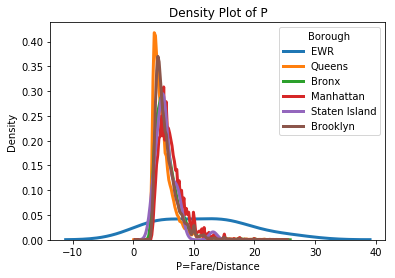

In [103]:
month=month.loc[(month['P']<25)]
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    
    sns.distplot(subset['P'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = zona)
plt.legend(prop={'size': 10}, title = 'Borough')
plt.title('Density Plot of P')
plt.xlabel('P=Fare/Distance')
plt.ylabel('Density')

In [104]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Mean of NewP for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.mean(subset['New P']), 3))

Mean of NewP for EWR is:0.072
Mean of NewP for Queens is:0.014
Mean of NewP for Bronx is:0.015
Mean of NewP for Manhattan is:0.016
Mean of NewP for Staten Island is:0.014
Mean of NewP for Brooklyn is:0.014


In [105]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Standard deviation of NewP for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.stdev(subset['New P']), 3))

Standard deviation of NewP for EWR is:0.081
Standard deviation of NewP for Queens is:0.019
Standard deviation of NewP for Bronx is:0.021
Standard deviation of NewP for Manhattan is:0.018
Standard deviation of NewP for Staten Island is:0.013
Standard deviation of NewP for Brooklyn is:0.018


C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

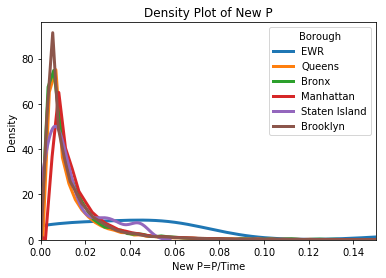

In [106]:
plt.xlim(0,0.15)
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    
    sns.distplot(subset['New P'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = zona)
plt.legend(prop={'size': 10}, title = 'Borough')
plt.title('Density Plot of New P')
plt.xlabel('New P=P/Time')
plt.ylabel('Density')

In [107]:
month=read_csv('mar',3)
month=month.loc[(month['trip_distance']!=0)]
month=month.loc[month['fare_amount']>2.5]
month.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
zone=pd.read_csv('taxi_zone_lookup.csv', sep=',', usecols=['LocationID','Borough'])
month = pd.merge(zone, month, on='LocationID')

In [108]:
Q1=month.trip_distance.quantile(0.25)
Q3=month.trip_distance.quantile(0.75)
W=Q3-Q1
bound=Q3+(1.5*W)
month=month.loc[(month['trip_distance']<bound)]

In [109]:
month['tpep_dropoff_datetime']=pandas.to_datetime(month['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
month['tpep_pickup_datetime']=pandas.to_datetime(month['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
durata=month['tpep_dropoff_datetime']-month['tpep_pickup_datetime']
del month['tpep_pickup_datetime']
del month['tpep_dropoff_datetime']

In [110]:
durata=pandas.DataFrame(durata)
durata=durata[0].apply(inSeconds)
month['DeltaTime']=durata
month=month.loc[(month['DeltaTime']>60)]
month=month.loc[(month['DeltaTime']<10800)]

In [111]:
P=month['fare_amount']/month['trip_distance']
month['P']=P
newP=month['P']/month['DeltaTime']
month['New P']=newP

In [112]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Mean of P for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.mean(subset['P']), 3))

Mean of P for EWR is:1164.171
Mean of P for Queens is:8.672
Mean of P for Bronx is:7.831
Mean of P for Manhattan is:6.53
Mean of P for Staten Island is:15.196
Mean of P for Brooklyn is:6.04


In [113]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Standard deviation of P for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.stdev(subset['P']), 3))

Standard deviation of P for EWR is:2581.727
Standard deviation of P for Queens is:103.669
Standard deviation of P for Bronx is:74.126
Standard deviation of P for Manhattan is:106.151
Standard deviation of P for Staten Island is:49.259
Standard deviation of P for Brooklyn is:50.005


C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

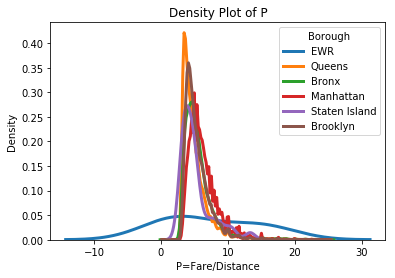

In [114]:
month=month.loc[(month['P']<25)]
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    
    sns.distplot(subset['P'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = zona)
plt.legend(prop={'size': 10}, title = 'Borough')
plt.title('Density Plot of P')
plt.xlabel('P=Fare/Distance')
plt.ylabel('Density')

In [115]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Mean of NewP for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.mean(subset['New P']), 3))

Mean of NewP for EWR is:0.021
Mean of NewP for Queens is:0.013
Mean of NewP for Bronx is:0.014
Mean of NewP for Manhattan is:0.016
Mean of NewP for Staten Island is:0.014
Mean of NewP for Brooklyn is:0.014


In [116]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Standard deviation of NewP for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.stdev(subset['New P']), 3))

Standard deviation of NewP for EWR is:0.024
Standard deviation of NewP for Queens is:0.02
Standard deviation of NewP for Bronx is:0.021
Standard deviation of NewP for Manhattan is:0.018
Standard deviation of NewP for Staten Island is:0.017
Standard deviation of NewP for Brooklyn is:0.018


C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

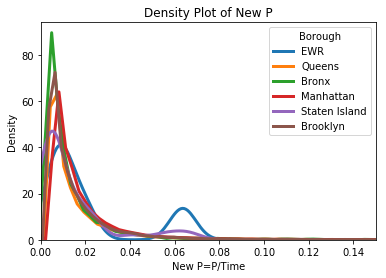

In [117]:
plt.xlim(0,0.15)
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    
    sns.distplot(subset['New P'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = zona)
plt.legend(prop={'size': 10}, title = 'Borough')
plt.title('Density Plot of New P')
plt.xlabel('New P=P/Time')
plt.ylabel('Density')

In [118]:
month=read_csv('apr',4)
month=month.loc[(month['trip_distance']!=0)]
month=month.loc[month['fare_amount']>2.5]
month.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
zone=pd.read_csv('taxi_zone_lookup.csv', sep=',', usecols=['LocationID','Borough'])
month = pd.merge(zone, month, on='LocationID')

In [119]:
Q1=month.trip_distance.quantile(0.25)
Q3=month.trip_distance.quantile(0.75)
W=Q3-Q1
bound=Q3+(1.5*W)
month=month.loc[(month['trip_distance']<bound)]

In [120]:
month['tpep_dropoff_datetime']=pandas.to_datetime(month['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
month['tpep_pickup_datetime']=pandas.to_datetime(month['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
durata=month['tpep_dropoff_datetime']-month['tpep_pickup_datetime']
del month['tpep_pickup_datetime']
del month['tpep_dropoff_datetime']

In [121]:
durata=pandas.DataFrame(durata)
durata=durata[0].apply(inSeconds)
month['DeltaTime']=durata
month=month.loc[(month['DeltaTime']>60)]
month=month.loc[(month['DeltaTime']<10800)]

In [122]:
P=month['fare_amount']/month['trip_distance']
month['P']=P
newP=month['P']/month['DeltaTime']
month['New P']=newP

In [123]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Mean of P for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.mean(subset['P']), 3))

Mean of P for EWR is:600.285
Mean of P for Queens is:8.873
Mean of P for Bronx is:7.589
Mean of P for Manhattan is:6.536
Mean of P for Staten Island is:5.032
Mean of P for Brooklyn is:5.777


In [124]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Standard deviation of P for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.stdev(subset['P']), 3))

Standard deviation of P for EWR is:823.217
Standard deviation of P for Queens is:120.531
Standard deviation of P for Bronx is:47.596
Standard deviation of P for Manhattan is:14.878
Standard deviation of P for Staten Island is:2.792
Standard deviation of P for Brooklyn is:22.98


C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

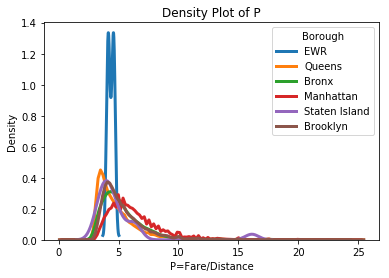

In [125]:
month=month.loc[(month['P']<25)]
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    
    sns.distplot(subset['P'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = zona)
plt.legend(prop={'size': 10}, title = 'Borough')
plt.title('Density Plot of P')
plt.xlabel('P=Fare/Distance')
plt.ylabel('Density')

In [126]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Mean of NewP for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.mean(subset['New P']), 3))

Mean of NewP for EWR is:0.013
Mean of NewP for Queens is:0.013
Mean of NewP for Bronx is:0.013
Mean of NewP for Manhattan is:0.015
Mean of NewP for Staten Island is:0.015
Mean of NewP for Brooklyn is:0.013


In [127]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Standard deviation of NewP for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.stdev(subset['New P']), 3))

Standard deviation of NewP for EWR is:0.011
Standard deviation of NewP for Queens is:0.019
Standard deviation of NewP for Bronx is:0.019
Standard deviation of NewP for Manhattan is:0.017
Standard deviation of NewP for Staten Island is:0.013
Standard deviation of NewP for Brooklyn is:0.018


C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

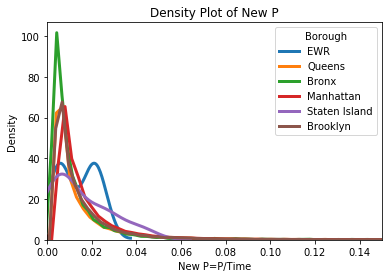

In [128]:
plt.xlim(0,0.15)
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    
    sns.distplot(subset['New P'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = zona)
plt.legend(prop={'size': 10}, title = 'Borough')
plt.title('Density Plot of New P')
plt.xlabel('New P=P/Time')
plt.ylabel('Density')

In [129]:
month=read_csv('may',5)
month=month.loc[(month['trip_distance']!=0)]
month=month.loc[month['fare_amount']>2.5]
month.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
zone=pd.read_csv('taxi_zone_lookup.csv', sep=',', usecols=['LocationID','Borough'])
month = pd.merge(zone, month, on='LocationID')

In [130]:
Q1=month.trip_distance.quantile(0.25)
Q3=month.trip_distance.quantile(0.75)
W=Q3-Q1
bound=Q3+(1.5*W)
month=month.loc[(month['trip_distance']<bound)]

In [131]:
month['tpep_dropoff_datetime']=pandas.to_datetime(month['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
month['tpep_pickup_datetime']=pandas.to_datetime(month['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
durata=month['tpep_dropoff_datetime']-month['tpep_pickup_datetime']
del month['tpep_pickup_datetime']
del month['tpep_dropoff_datetime']

In [132]:
durata=pandas.DataFrame(durata)
durata=durata[0].apply(inSeconds)
month['DeltaTime']=durata
month=month.loc[(month['DeltaTime']>60)]
month=month.loc[(month['DeltaTime']<10800)]

In [133]:
P=month['fare_amount']/month['trip_distance']
month['P']=P
newP=month['P']/month['DeltaTime']
month['New P']=newP

In [134]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Mean of P for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.mean(subset['P']), 3))

Mean of P for EWR is:542.441
Mean of P for Queens is:8.788
Mean of P for Bronx is:7.753
Mean of P for Manhattan is:6.632
Mean of P for Staten Island is:49.473
Mean of P for Brooklyn is:5.735


In [135]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Standard deviation of P for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.stdev(subset['P']), 3))

Standard deviation of P for EWR is:1563.409
Standard deviation of P for Queens is:99.233
Standard deviation of P for Bronx is:70.694
Standard deviation of P for Manhattan is:25.208
Standard deviation of P for Staten Island is:238.378
Standard deviation of P for Brooklyn is:17.004


C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

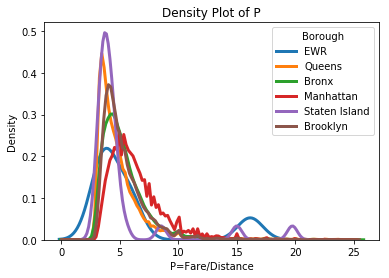

In [136]:
month=month.loc[(month['P']<25)]
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    
    sns.distplot(subset['P'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = zona)
plt.legend(prop={'size': 10}, title = 'Borough')
plt.title('Density Plot of P')
plt.xlabel('P=Fare/Distance')
plt.ylabel('Density')

In [137]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Mean of NewP for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.mean(subset['New P']), 3))

Mean of NewP for EWR is:0.055
Mean of NewP for Queens is:0.012
Mean of NewP for Bronx is:0.013
Mean of NewP for Manhattan is:0.015
Mean of NewP for Staten Island is:0.022
Mean of NewP for Brooklyn is:0.013


In [138]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Standard deviation of NewP for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.stdev(subset['New P']), 3))

Standard deviation of NewP for EWR is:0.079
Standard deviation of NewP for Queens is:0.019
Standard deviation of NewP for Bronx is:0.019
Standard deviation of NewP for Manhattan is:0.017
Standard deviation of NewP for Staten Island is:0.041
Standard deviation of NewP for Brooklyn is:0.017


C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

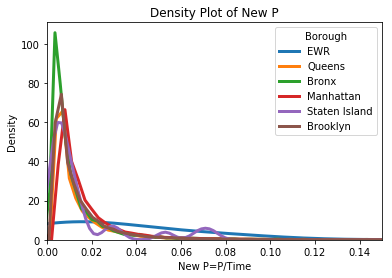

In [139]:
plt.xlim(0,0.15)
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    
    sns.distplot(subset['New P'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = zona)
plt.legend(prop={'size': 10}, title = 'Borough')
plt.title('Density Plot of New P')
plt.xlabel('New P=P/Time')
plt.ylabel('Density')

In [140]:
month=read_csv('jun',6)
month=month.loc[(month['trip_distance']!=0)]
month=month.loc[month['fare_amount']>2.5]
month.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
zone=pd.read_csv('taxi_zone_lookup.csv', sep=',', usecols=['LocationID','Borough'])
month = pd.merge(zone, month, on='LocationID')

In [141]:
Q1=month.trip_distance.quantile(0.25)
Q3=month.trip_distance.quantile(0.75)
W=Q3-Q1
bound=Q3+(1.5*W)
month=month.loc[(month['trip_distance']<bound)]

In [142]:
month['tpep_dropoff_datetime']=pandas.to_datetime(month['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
month['tpep_pickup_datetime']=pandas.to_datetime(month['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
durata=month['tpep_dropoff_datetime']-month['tpep_pickup_datetime']
del month['tpep_pickup_datetime']
del month['tpep_dropoff_datetime']

In [143]:
durata=pandas.DataFrame(durata)
durata=durata[0].apply(inSeconds)
month['DeltaTime']=durata
month=month.loc[(month['DeltaTime']>60)]
month=month.loc[(month['DeltaTime']<10800)]

In [144]:
P=month['fare_amount']/month['trip_distance']
month['P']=P
newP=month['P']/month['DeltaTime']
month['New P']=newP

In [145]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Mean of P for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.mean(subset['P']), 3))

Mean of P for EWR is:363.447
Mean of P for Queens is:9.051
Mean of P for Bronx is:7.555
Mean of P for Manhattan is:6.546
Mean of P for Staten Island is:19.616
Mean of P for Brooklyn is:5.674


In [146]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Standard deviation of P for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.stdev(subset['P']), 3))

Standard deviation of P for EWR is:573.56
Standard deviation of P for Queens is:119.346
Standard deviation of P for Bronx is:42.266
Standard deviation of P for Manhattan is:16.471
Standard deviation of P for Staten Island is:55.415
Standard deviation of P for Brooklyn is:17.536


C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

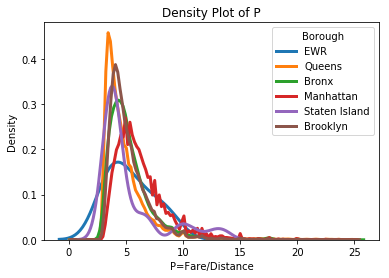

In [147]:
month=month.loc[(month['P']<25)]
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    
    sns.distplot(subset['P'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = zona)
plt.legend(prop={'size': 10}, title = 'Borough')
plt.title('Density Plot of P')
plt.xlabel('P=Fare/Distance')
plt.ylabel('Density')

In [148]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Mean of NewP for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.mean(subset['New P']), 3))

Mean of NewP for EWR is:0.041
Mean of NewP for Queens is:0.012
Mean of NewP for Bronx is:0.013
Mean of NewP for Manhattan is:0.015
Mean of NewP for Staten Island is:0.017
Mean of NewP for Brooklyn is:0.013


In [149]:
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    print('Standard deviation of NewP for ',end='')
    print(zona,end='')
    print(' is:',end='')
    print(round(statistics.stdev(subset['New P']), 3))

Standard deviation of NewP for EWR is:0.04
Standard deviation of NewP for Queens is:0.018
Standard deviation of NewP for Bronx is:0.02
Standard deviation of NewP for Manhattan is:0.017
Standard deviation of NewP for Staten Island is:0.023
Standard deviation of NewP for Brooklyn is:0.017


C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

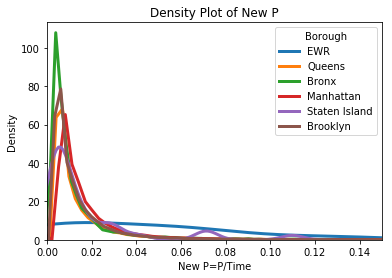

In [150]:
plt.xlim(0,0.15)
for zona in zoneName:
    subset = month[month['Borough'] == zona]
    
    sns.distplot(subset['New P'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = zona)
plt.legend(prop={'size': 10}, title = 'Borough')
plt.title('Density Plot of New P')
plt.xlabel('New P=P/Time')
plt.ylabel('Density')

### Results[CRQ1]
Division by *Duration* of the variable *P=Fare amount/Distance* has managed to mitigate the effect of traffic and we saw that there is not difference in costs of taxis through borough. 

**[CRQ2]**: Visualize Taxis movements! NYC is divided in many Taxis zones. For each yellow cab trip we know the zone the Taxi pick up and drop off the users. Let's visualize, on a chropleth map, the number of trips that starts in each zone. Than, do another map to count the races that end up in the single zone. Comment your discoveries. To perform this task we use the library folium. You find some examples of chorophlet maps here and here. The Geojson we use to trace the zones is taxi_zones.json in the Homework's repository.

we import the libraries we will need

In [36]:
import pandas 
import numpy as np
from datetime import datetime
import time
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sys import getsizeof as get

import folium as folium

import json
import branca.colormap as cm
import os
from branca.colormap import linear

In [2]:
def read_csv(month,number):
    cmd= month+"=pandas.read_csv('yellow_tripdata_2018-0"+str(number)+".csv', sep=',',dtype={'DOLocationID':str,'PULocationID':str}, usecols=['DOLocationID','PULocationID'])"
    exec(cmd)
    return eval(month)

We create a DataFrame *df* with all the DataFrames of the 6 months

In [11]:
df= pandas.DataFrame()
df["PULocationID"] = ""
df["PULocationID"] = ""

In [12]:
df1=read_csv('jan',1)
df=pandas.concat([df,df1])
del df1

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [13]:
df1=read_csv('feb',2)
df=pandas.concat([df,df1])
del df1

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [14]:
df1=read_csv('mar',3)
df=pandas.concat([df,df1])
del df1

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [15]:
df1=read_csv('apr',4)
df=pandas.concat([df,df1])
del df1

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [16]:
df1=read_csv('may',5)
df=pandas.concat([df,df1])
del df1

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [17]:
df1=read_csv('jun',6)
df=pandas.concat([df,df1])
del df1

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Since at first we want a map with Picking locations. We make a New DataFrame only with the "PULocationID" column.

In [18]:
pickup=df.filter(['PULocationID'])

Here we can see what is inside pickup DataFrame

In [20]:
pickup.head()

,PULocationID
0,41
1,239
2,262
3,140
4,246


Now we create the NYC map!

In [21]:
NYmap=folium.Map(
    location=[40.7142700, -74.0059700],   #coordinates of new York
    zoom_start=11,                        
    tiles='CartoDB positron'              
)

We can't see the Map on Jupyter Notebook. So we save the plot image in a folder. You can find all these images in the repository, inside a folder called **PLOT**

In [22]:
NYmap.save(os.path.join('results', r"C:\Users\mvice\Desktop\HW 2 aris\task 2-2\NYCzones.html"))

Now we have to add zones to the map file we have already created

In [23]:
zone_geo = os.path.join('data', r"C:\Users\mvice\Desktop\HW 2 aris\task 2-2\taxi_zones.json")

geo_json_data = json.load(open(zone_geo))

For doing this we use the libraty *folium*

In [24]:
folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': '#00ff00',
        'color': 'Red',
        'weight': 0.2,
        'dashArray': '1, 1'
    }
).add_to(NYmap)

We can't see the Map on Jupyter Notebook. So we save the plot image in a folder. You can find all these images in the repository, inside a folder called **PLOT**

In [25]:
NYmap.save(os.path.join('results', r"C:\Users\mvice\Desktop\HW 2 aris\task 2-2\NYCzones.html"))

Now we have to create a clorphlet map with trips' number that starts in each zone. We must create a new DataFrame with the number of the taxi's trips in the zones.

In [26]:
df1=pickup.groupby(['PULocationID']).groups.keys()

To know the sum of the number of the zones we can look at the lenght of df1

In [27]:
len(df1)

263

In [28]:
dfpickup=pickup.groupby('PULocationID')['PULocationID'].count()

In [29]:
dfpickup.head()

PULocationID
1         3854
10       15534
100    1113009
101        441
102        572
Name: PULocationID, dtype: int64

In [30]:
pickupdf=pandas.DataFrame(index=list(range(1,266)),columns=[])

In [31]:
pickupdf['zone']=list(range(1,266))

In [32]:
final=[]
for i in range(1,266):
    j=str(i)
    if j in dfpickup:
        final.append(dfpickup[j])
    else:
        final.append(0)

In [33]:
pickupdf['Taxitrips']=final
pickupdf.head()

,zone,Taxitrips
1,1,3854
2,2,30
3,3,427
4,4,118026
5,5,18


In [34]:
NYmap2 = folium.Map(
    location=[40.7142700, -74.0059700],   
    zoom_start=11,                        
    tiles='CartoDB positron'              
)

In [ ]:
NYmap2.choropleth(
    geo_data=geo_json_data,  #our geojson datas
    data=pickupdf,    
    columns=['zone', 'Taxitrips'],
    key_on='feature.properties.LocationID', 
    fill_color='Oranges',   #the color scale that we want
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Number of taxi taken in NYC',
    highlight=True    
)

We can't see the Map on Jupyter Notebook. So we save the plot image in a folder. You can find all these images in the repository, inside a folder called **PLOT**

In [42]:
NYmap2.save(os.path.join('results', r"C:\Users\mvice\Desktop\HW 2 aris\task 2-2\NYCChoroPULocationID.html"))

Now we have to repeat the same algo, but for the other column(*DOLocationID*) of the first DataFrame *df*

In [43]:
drop=df.filter(['DOLocationID'])

In [44]:
df1=drop.groupby(['DOLocationID']).groups.keys()

In [45]:
dfdrop=drop.groupby('DOLocationID')['DOLocationID'].count()

In [47]:
dropdf=pandas.DataFrame(index=list(range(1,266)),columns=[])

In [48]:
dropdf['zone']=list(range(1,266))

In [49]:
final=[]
for i in range(1,266):
    j=str(i)
    if j in dfdrop:
        final.append(dfdrop[j])
    else:
        final.append(0)   

In [50]:
dropdf['Taxitrips']=final

In [ ]:
NYmap3 = folium.Map(
    location=[40.7142700, -74.0059700],   
    zoom_start=11,                        
    tiles='CartoDB positron'              
)
NYmap3.choropleth(
    geo_data=geo_json_data,  #our geojson datas
    data=dropdf,    
    columns=['zone', 'Taxitrips'],
    key_on='feature.properties.LocationID', 
    fill_color='YlOrBr',   #the color scale that we want
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Number of taxi droped in NYC',
    highlight=True    
)

In [53]:
NYmap3.save(os.path.join('results', r"C:\Users\mvice\Desktop\HW 2 aris\task 2-2\NYCChoroDOLocationID.html"))

# RESULTS [CRQ2]
As we can see from the two maps. Manhattan is the zone that is more crowed with taxis in NYC. There also two other zones very colored also, they are close to the airports of the city.